In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from scipy.stats import skew, kurtosis
warnings.simplefilter(action='ignore')
plt.style.use('bmh')

# **Data Understanding**

In [ ]:
data = pd.read_csv("/content/hyperten_train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   Age                70000 non-null  int64  
 2   Gender             70000 non-null  object 
 3   Height_cm          70000 non-null  int64  
 4   Weight_kg          70000 non-null  float64
 5   Systolic_BP        70000 non-null  int64  
 6   Diastolic_BP       70000 non-null  int64  
 7   Cholesterol        70000 non-null  object 
 8   Glucose            70000 non-null  object 
 9   Smoker             70000 non-null  object 
 10  Alcohol_Use        70000 non-null  object 
 11  Physical_Activity  70000 non-null  object 
 12  CDV_Risk           70000 non-null  object 
 13  Hypertension       70000 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 7.5+ MB


In [ ]:
data.dtypes

,0
id,int64
Age,int64
Gender,object
Height_cm,int64
Weight_kg,float64
Systolic_BP,int64
Diastolic_BP,int64
Cholesterol,object
Glucose,object
Smoker,object


In [ ]:
data.shape

(70000, 14)

In [ ]:
data.head()

,id,Age,Gender,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP,Cholesterol,Glucose,Smoker,Alcohol_Use,Physical_Activity,CDV_Risk,Hypertension
0,0,50,Male,168,62.0,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Active,Negative,Negative
1,1,55,Female,156,85.0,140,90,Well Above Normal,Normal,Non-Smoker,Non-Drinker,Active,Positive,Positive
2,2,51,Female,165,64.0,130,70,Well Above Normal,Normal,Non-Smoker,Non-Drinker,Inactive,Positive,Negative
3,3,48,Male,169,82.0,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Active,Positive,Positive
4,4,47,Female,156,56.0,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Inactive,Negative,Negative


In [ ]:
#Filter the dataset to include only hypertensive patients
data = data[data['Hypertension'] == 'Positive'].reset_index(drop=True)
#Drop the 'is_hypertensive' column as it's no longer needed
data.drop(columns=['Hypertension'], inplace=True)

In [ ]:
data.shape

(24705, 13)

In [ ]:
data.isnull().sum()

,0
id,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
Systolic_BP,0
Diastolic_BP,0
Cholesterol,0
Glucose,0
Smoker,0


In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['Cholesterol'].unique()

array(['Well Above Normal', 'Normal', 'Above Normal'], dtype=object)

In [ ]:
data['Glucose'].unique()

array(['Normal', 'Well Above Normal', 'Above Normal'], dtype=object)

In [ ]:
data['Smoker'].unique()

array(['Non-Smoker', 'Smoker'], dtype=object)

In [ ]:
data['Alcohol_Use'].unique()

array(['Non-Drinker', 'Drinker'], dtype=object)

In [ ]:
data['Physical_Activity'].unique()

array(['Active', 'Inactive'], dtype=object)

In [ ]:
data['CDV_Risk'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
data = data.drop(['id'],axis=1)

In [ ]:
data.duplicated().sum()

135

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
# Iterate over each column in the DataFrame 'student' print the count of unique values in the current column
for i in data.columns:
    print("Unique values in", i, "are : " )
    print(data[i].value_counts())
    print("*"*50)

Unique values in Age are : 
Age
59    1563
55    1523
57    1504
53    1439
61    1322
56    1322
63    1316
58    1234
60    1225
51    1215
54    1158
49    1123
52    1058
64    1035
62     992
50     930
47     732
45     630
43     565
48     538
46     432
41     402
44     392
39     356
42     284
40     280
Name: count, dtype: int64
**************************************************
Unique values in Gender are : 
Gender
Female    15366
Male       9204
Name: count, dtype: int64
**************************************************
Unique values in Height_cm are : 
Height_cm
160    1692
165    1689
170    1544
168    1415
158    1237
       ... 
125       1
67        1
250       1
119       1
57        1
Name: count, Length: 88, dtype: int64
**************************************************
Unique values in Weight_kg are : 
Weight_kg
70.00     1138
80.00     1086
75.00      940
65.00      879
68.00      787
          ... 
89.10        1
56.20        1
68.50        1
74.77        1

In [ ]:
data.describe()

,Age,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP
count,24570.000000,24570.000000,24570.000000,24570.000000,24570.000000
mean,54.249166,164.240578,78.780256,150.141677,133.841311
std,6.395580,8.503908,15.538119,258.210066,314.635629
min,39.000000,55.000000,10.000000,-140.000000,0.000000
25%,50.000000,158.000000,68.000000,140.000000,90.000000
50%,55.000000,164.000000,77.000000,140.000000,90.000000
75%,59.000000,170.000000,88.000000,150.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


In [ ]:
data.shape

(24570, 12)

# **Data Processing**

### **Removing outliers and incorrect based on realistic ranges**

In [ ]:
data = data[(data['Height_cm'] >= 60) & (data['Height_cm'] <= 230)]
data = data[(data['Weight_kg'] >= 20) & (data['Weight_kg'] <= 635)]
data = data[(data['Systolic_BP'] >= 70) & (data['Systolic_BP'] <= 300)]
data = data[(data['Diastolic_BP'] >= 40) & (data['Diastolic_BP'] <= 200)]

In [ ]:
Original_data = data.copy()

In [ ]:
binary_categorical_columns = ['Gender', 'Smoker', 'Alcohol_Use', 'Physical_Activity','CDV_Risk']
non_binary_categorical_columns = ['Cholesterol', 'Glucose']

In [ ]:
nonCategorical_columns = ['Age','Height_cm','Weight_kg','Systolic_BP','Diastolic_BP']

In [ ]:
# Apply StandardScaler to these columns
scaler = StandardScaler()
data[nonCategorical_columns] = scaler.fit_transform(data[nonCategorical_columns])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with non binary categorical data
dependents_dummie = pd.get_dummies(data['Cholesterol'], prefix = 'Cholesterol')
property_Area_dummie = pd.get_dummies(data['Glucose'], prefix = 'Glucose')

# Remove categorical columns (will replace with one-hot encoding)
num_data = data.drop(non_binary_categorical_columns, axis=1)

# Add one-hot encoded columns to numerical features
OH_data = pd.concat([num_data, dependents_dummie,property_Area_dummie], axis=1)


# Ensure all columns have string type
OH_data.columns = OH_data.columns.astype(str)

OH_data.head()

,Age,Gender,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP,Smoker,Alcohol_Use,Physical_Activity,CDV_Risk,Cholesterol_Above Normal,Cholesterol_Normal,Cholesterol_Well Above Normal,Glucose_Above Normal,Glucose_Normal,Glucose_Well Above Normal
0,0.114631,Female,-0.978711,0.406297,-0.261889,-0.077145,Non-Smoker,Non-Drinker,Active,Positive,False,False,True,False,True,False
1,-0.980614,Male,0.564740,0.212072,0.403007,1.097953,Non-Smoker,Non-Drinker,Active,Positive,False,True,False,False,True,False
2,1.053412,Male,1.633283,1.053715,-0.926785,-0.077145,Non-Smoker,Non-Drinker,Active,Positive,False,False,True,False,False,True
3,-2.388786,Male,1.989464,1.053715,-0.926785,-0.077145,Smoker,Drinker,Active,Negative,False,True,False,False,True,False
4,1.366339,Female,-0.741257,0.730006,0.070559,-0.664694,Non-Smoker,Non-Drinker,Active,Positive,True,False,False,True,False,False


In [ ]:
# Transforming categorical data into numerical ordinal values
ordinal_encoder = OrdinalEncoder()
OH_data[binary_categorical_columns] = ordinal_encoder.fit_transform(OH_data[binary_categorical_columns])
OH_data.head()

,Age,Gender,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP,Smoker,Alcohol_Use,Physical_Activity,CDV_Risk,Cholesterol_Above Normal,Cholesterol_Normal,Cholesterol_Well Above Normal,Glucose_Above Normal,Glucose_Normal,Glucose_Well Above Normal
0,0.114631,0.0,-0.978711,0.406297,-0.261889,-0.077145,0.0,1.0,0.0,1.0,False,False,True,False,True,False
1,-0.980614,1.0,0.564740,0.212072,0.403007,1.097953,0.0,1.0,0.0,1.0,False,True,False,False,True,False
2,1.053412,1.0,1.633283,1.053715,-0.926785,-0.077145,0.0,1.0,0.0,1.0,False,False,True,False,False,True
3,-2.388786,1.0,1.989464,1.053715,-0.926785,-0.077145,1.0,0.0,0.0,0.0,False,True,False,False,True,False
4,1.366339,0.0,-0.741257,0.730006,0.070559,-0.664694,0.0,1.0,0.0,1.0,True,False,False,True,False,False


### **Handling Missing Values**

In [ ]:
data_plus = OH_data.copy()
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]


for col in cols_with_missing:
  data_plus[col + '_was_missing'] = data[col].isnull()

print(data_plus.head())

        Age  Gender  Height_cm  Weight_kg  Systolic_BP  Diastolic_BP  Smoker  \
0  0.114631     0.0  -0.978711   0.406297    -0.261889     -0.077145     0.0   
1 -0.980614     1.0   0.564740   0.212072     0.403007      1.097953     0.0   
2  1.053412     1.0   1.633283   1.053715    -0.926785     -0.077145     0.0   
3 -2.388786     1.0   1.989464   1.053715    -0.926785     -0.077145     1.0   
4  1.366339     0.0  -0.741257   0.730006     0.070559     -0.664694     0.0   

   Alcohol_Use  Physical_Activity  CDV_Risk  Cholesterol_Above Normal  \
0          1.0                0.0       1.0                     False   
1          1.0                0.0       1.0                     False   
2          1.0                0.0       1.0                     False   
3          0.0                0.0       0.0                     False   
4          1.0                0.0       1.0                      True   

   Cholesterol_Normal  Cholesterol_Well Above Normal  Glucose_Above Normal  \
0 

In [ ]:
my_imputer = SimpleImputer()
imputedData = pd.DataFrame(my_imputer.fit_transform(data_plus))
imputedData.columns = data_plus.columns
imputedData.head(50)
imputedData.isnull().sum()

,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
Systolic_BP,0
Diastolic_BP,0
Smoker,0
Alcohol_Use,0
Physical_Activity,0
CDV_Risk,0


In [ ]:
imputedData.shape

(23511, 16)

### **Data Visualization**

**Initial data visualizations**

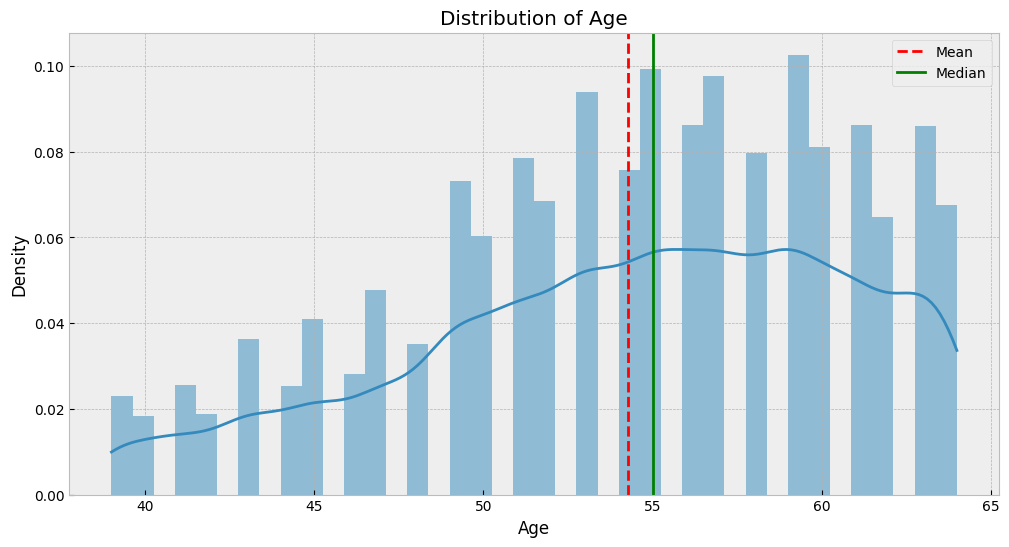

Age - Skewness: -0.47, Kurtosis: -0.57



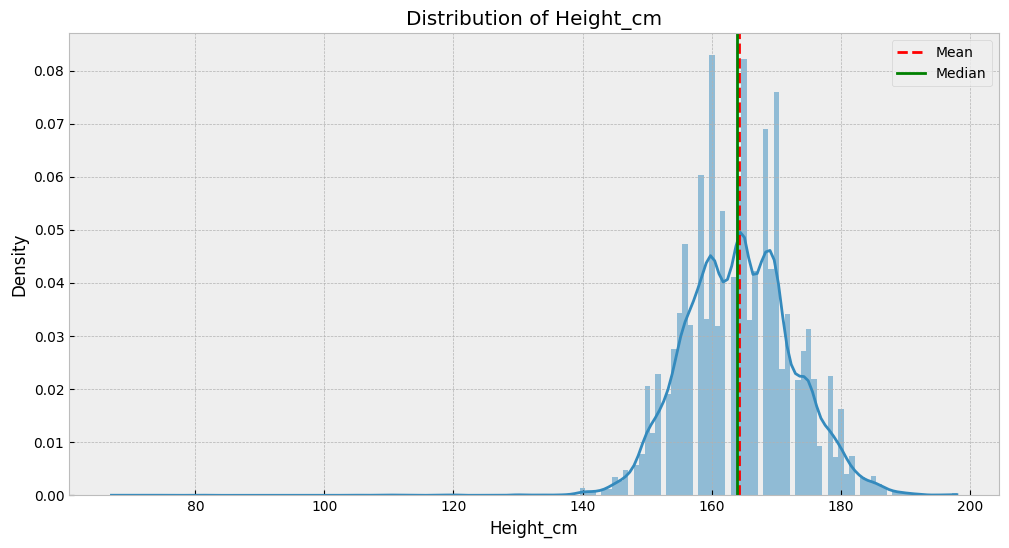

Height_cm - Skewness: -0.32, Kurtosis: 3.79



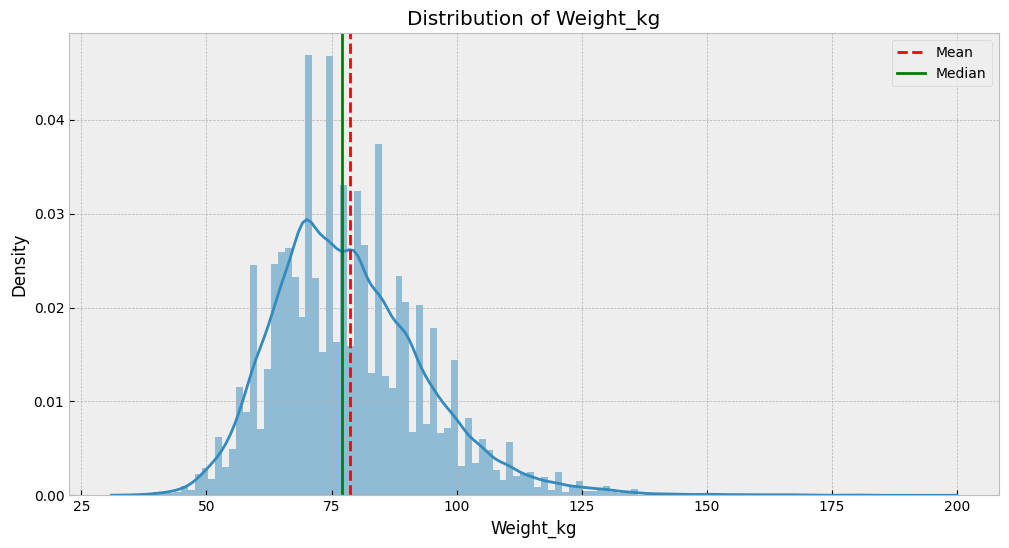

Weight_kg - Skewness: 0.91, Kurtosis: 2.06



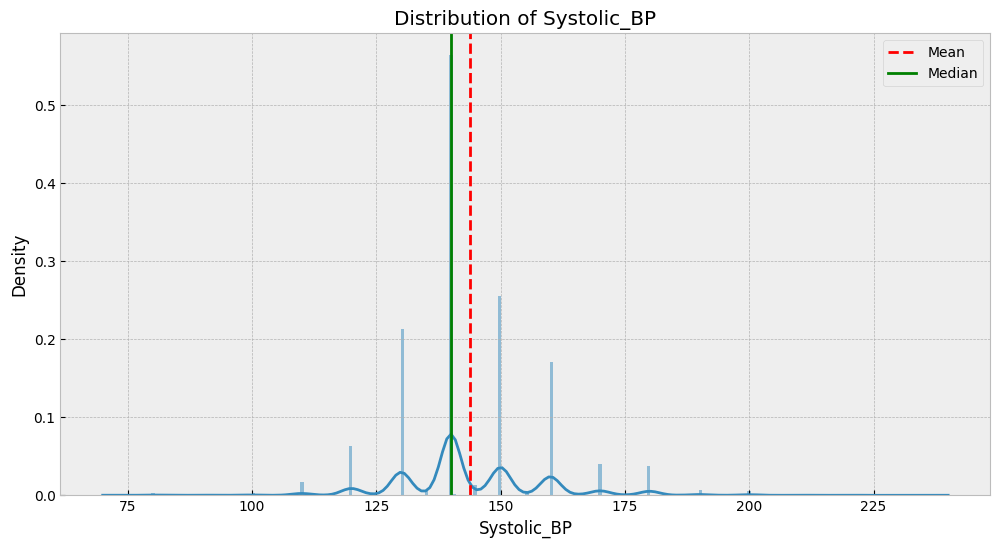

Systolic_BP - Skewness: 0.57, Kurtosis: 3.12



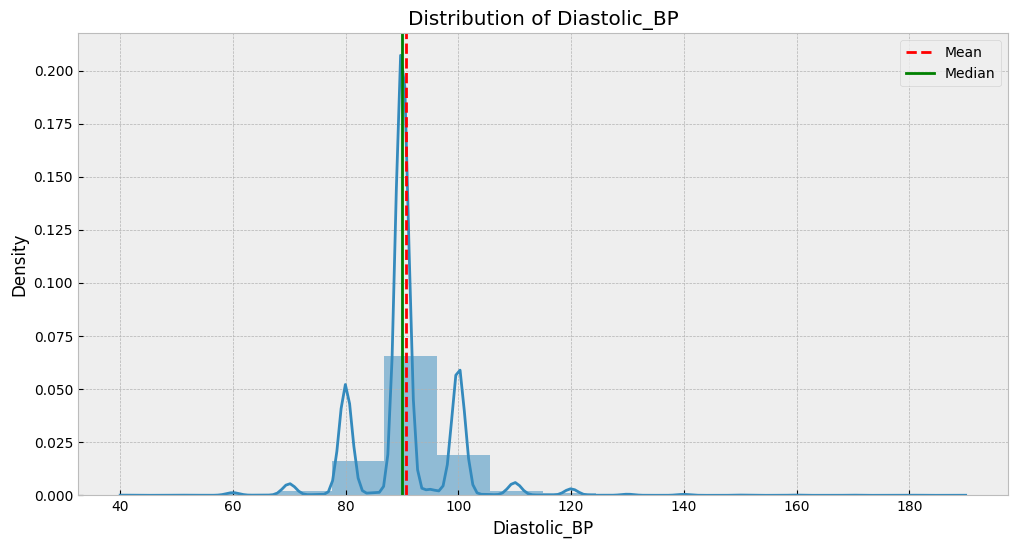

Diastolic_BP - Skewness: 1.27, Kurtosis: 11.49



In [ ]:
#Plotting distribution plots, skewness, and kurtosis
for column in nonCategorical_columns:
    plt.figure(figsize=(12, 6))

    #Histogram and KDE plot
    sns.histplot(Original_data[column], kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

    #Calculate and display skewness and kurtosis
    skewness = skew(Original_data[column])
    kurt = kurtosis(Original_data[column])
    plt.axvline(Original_data[column].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(Original_data[column].median(), color='g', linestyle='-', label='Median')
    plt.legend()
    plt.show()

    print(f'{column} - Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}\n')


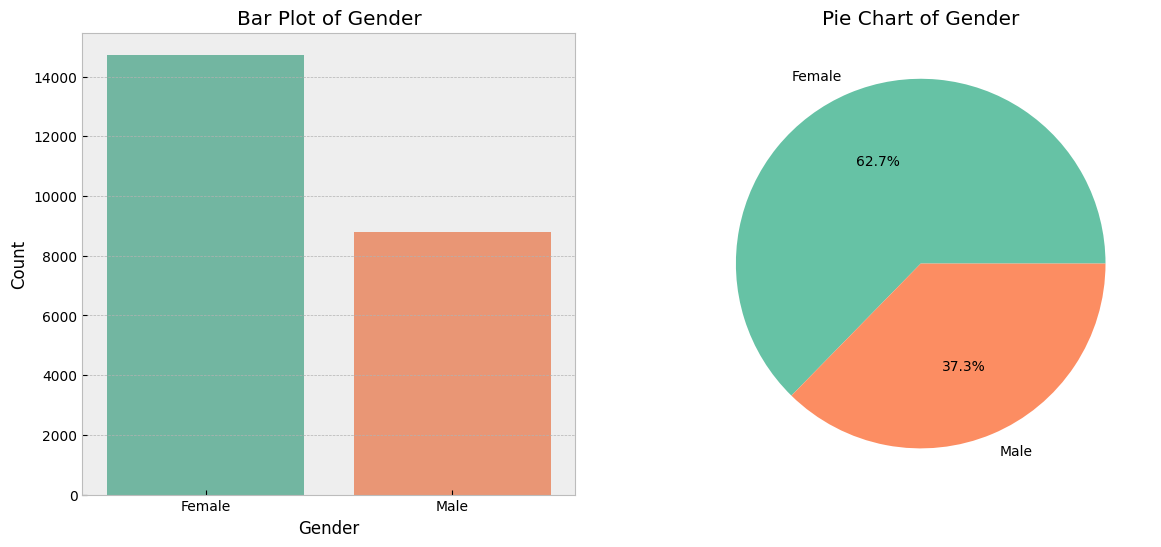

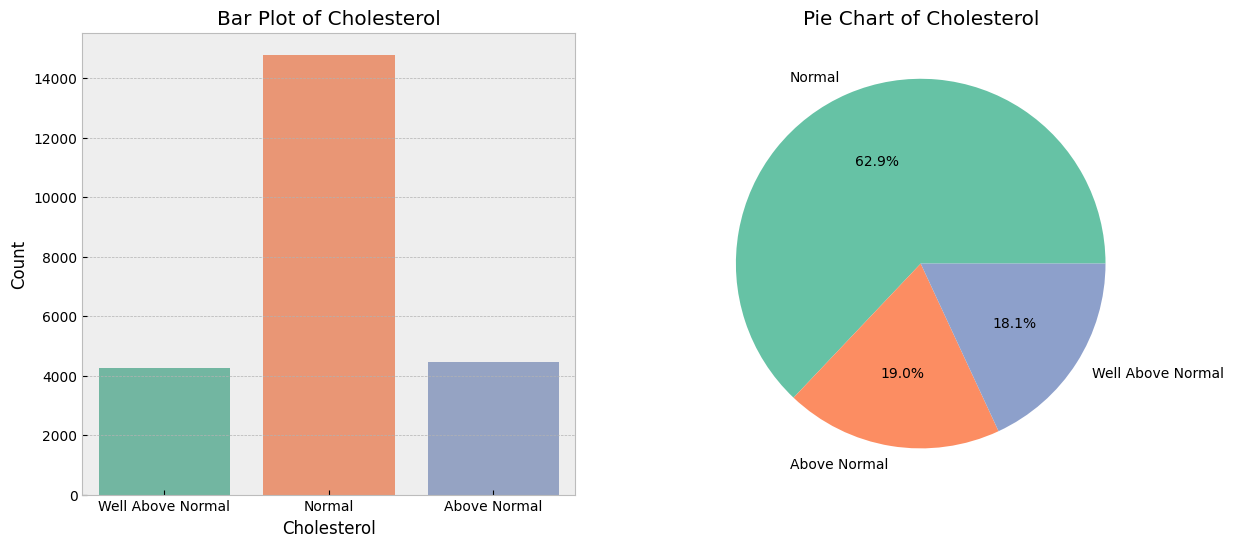

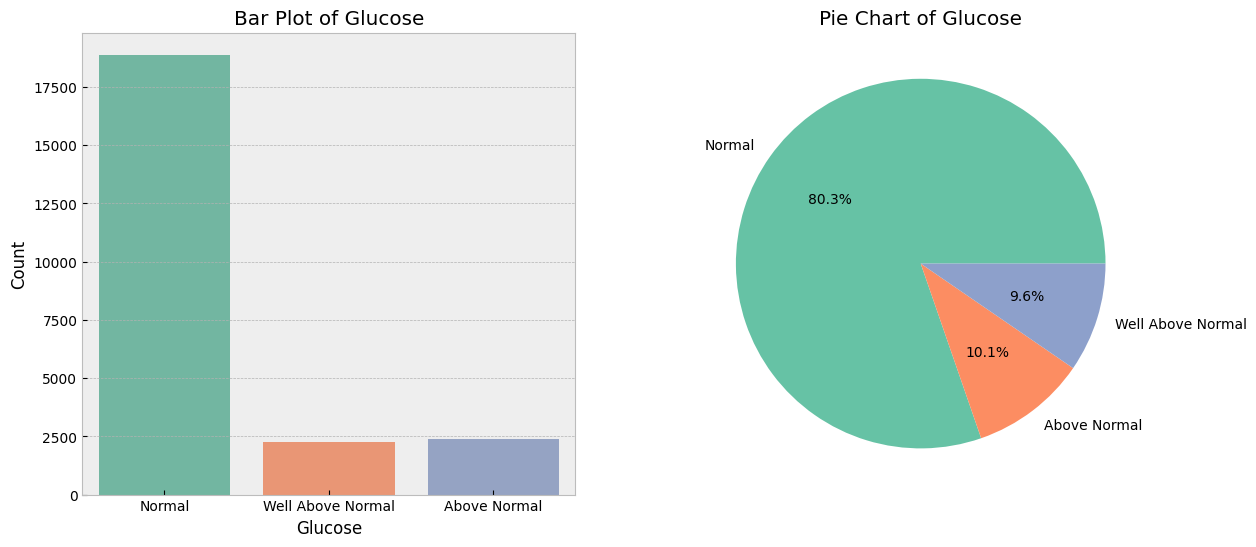

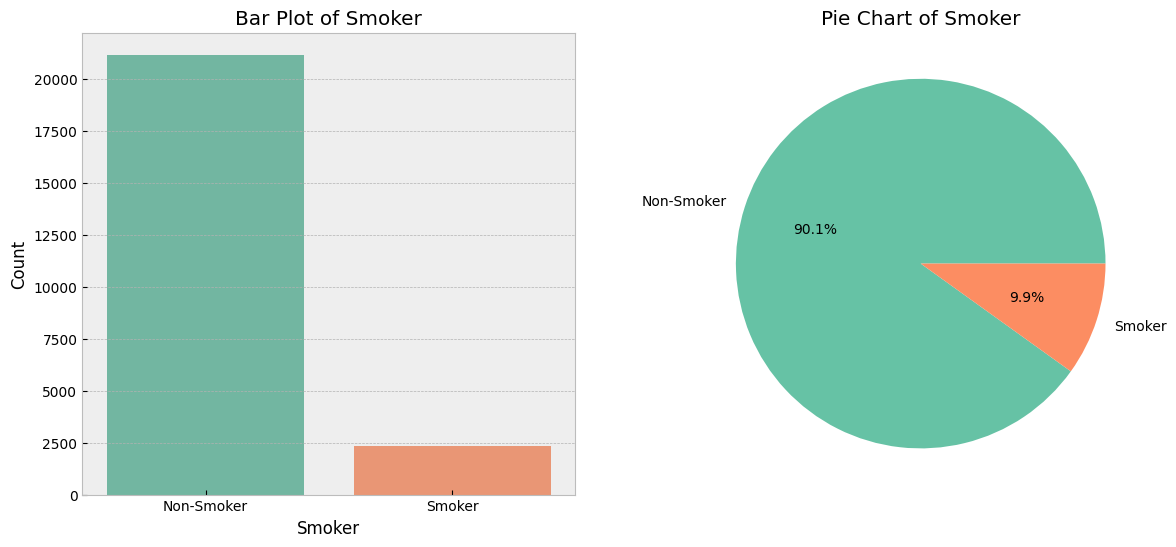

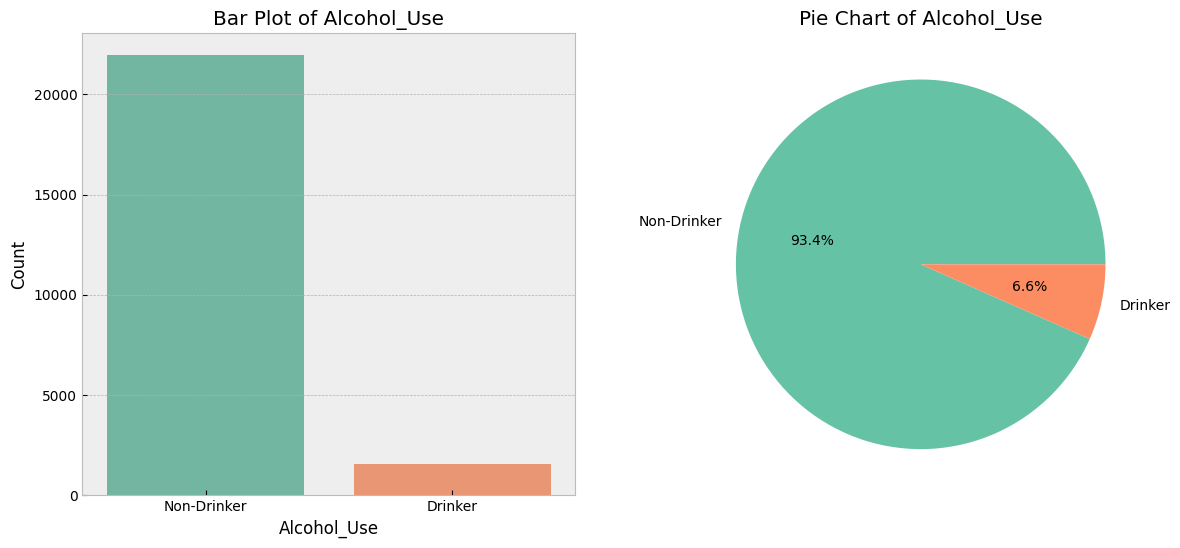

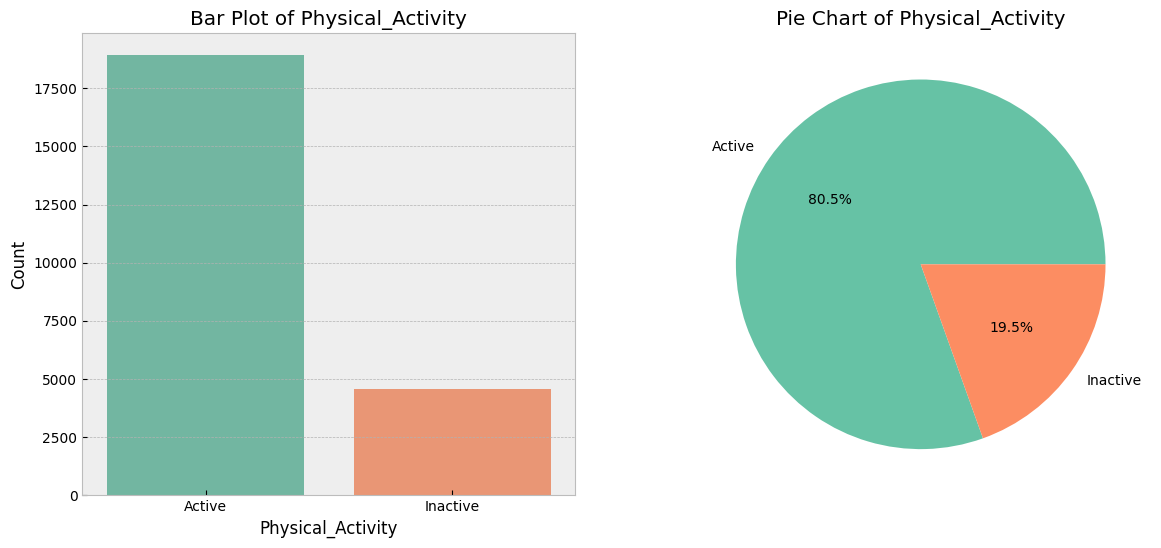

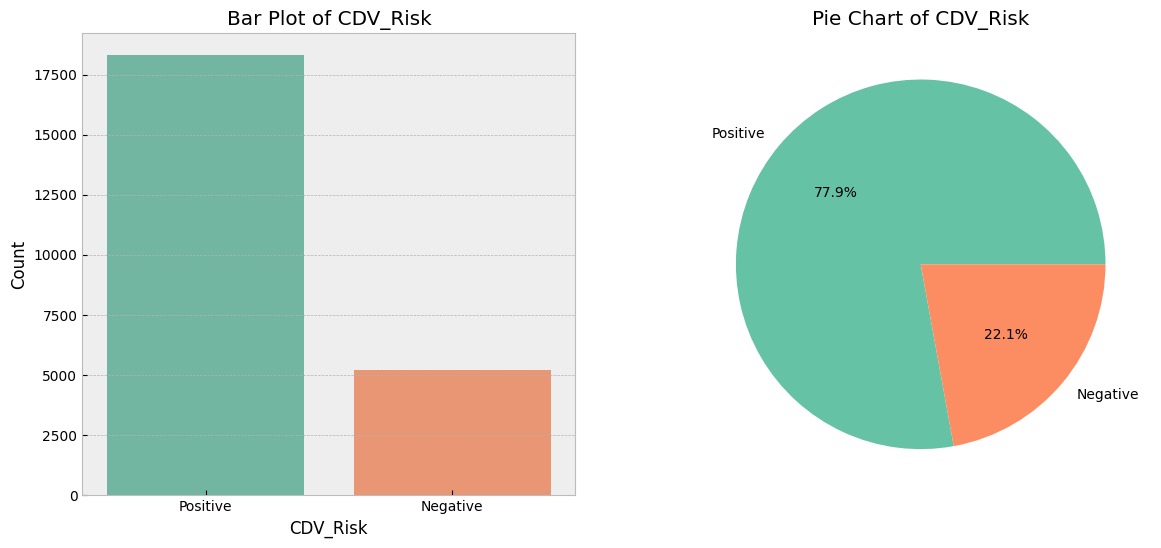

In [ ]:
#List of categorical columns to analyze
categorical_columns = [
    'Gender', 'Cholesterol', 'Glucose',
    'Smoker', 'Alcohol_Use', 'Physical_Activity',
    'CDV_Risk'
]

#Plotting bar plots and pie charts for categorical features
for column in categorical_columns:
    plt.figure(figsize=(14, 6))

    #Bar plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=Original_data, x=column, hue=column, palette='Set2')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    #Pie chart
    plt.subplot(1, 2, 2)
    Original_data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')

    plt.show()


In [ ]:
# Generate a combined histogram and boxplot for the given feature(s) in the dataset.
def hist_box(data, features, figsize=(12,7), kde=False, bins=None):
    f2, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex = True,
    gridspec_kw = {'height_ratios' : (0.25, 0.75)},
    figsize = figsize
    )
    sns.boxplot(
    data = data, x = features, ax = ax_box, showmeans = True, color = "violet"
    )
    sns.histplot(
    data = data, x = features, kde=kde, ax = ax_hist, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x= features, kde = kde, ax=ax_hist,
    )
    ax_hist.axvline(
    data[features].mean(), color = "green", linestyle="--"
    )
    ax_hist.axvline(
    data[features].median(), color = "blue", linestyle = "-"
    )

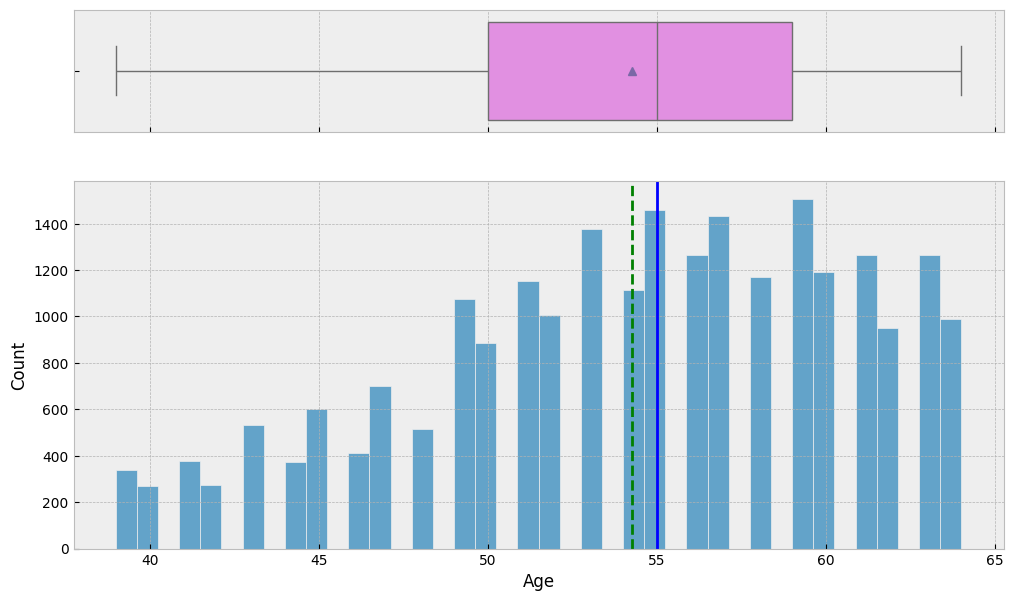

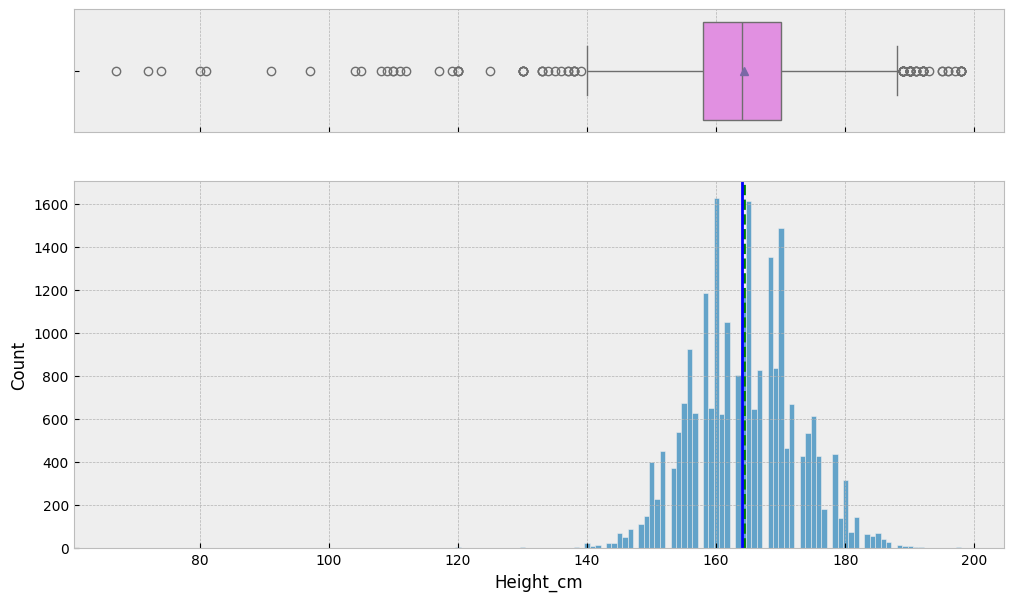

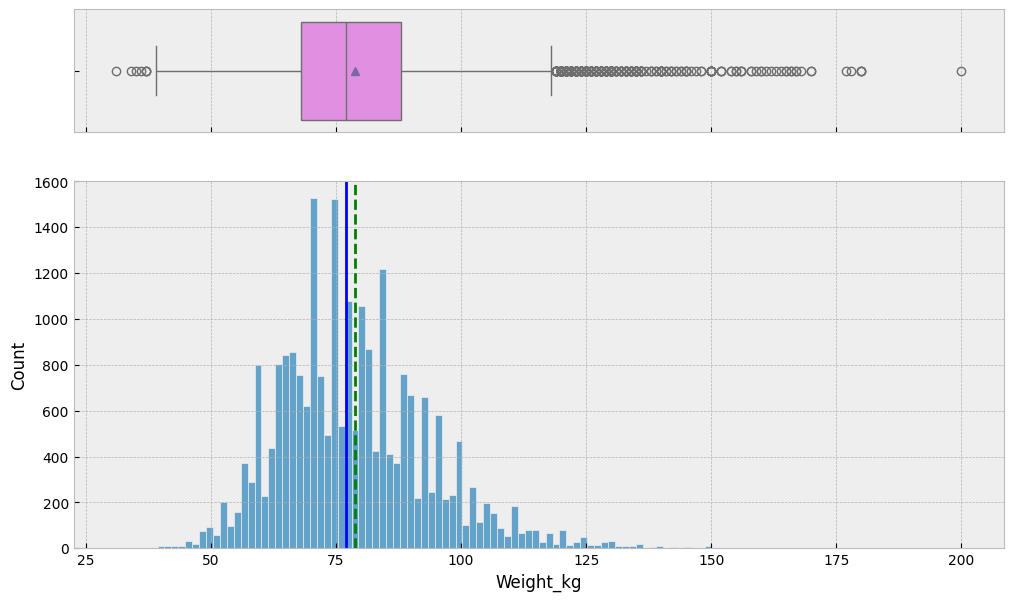

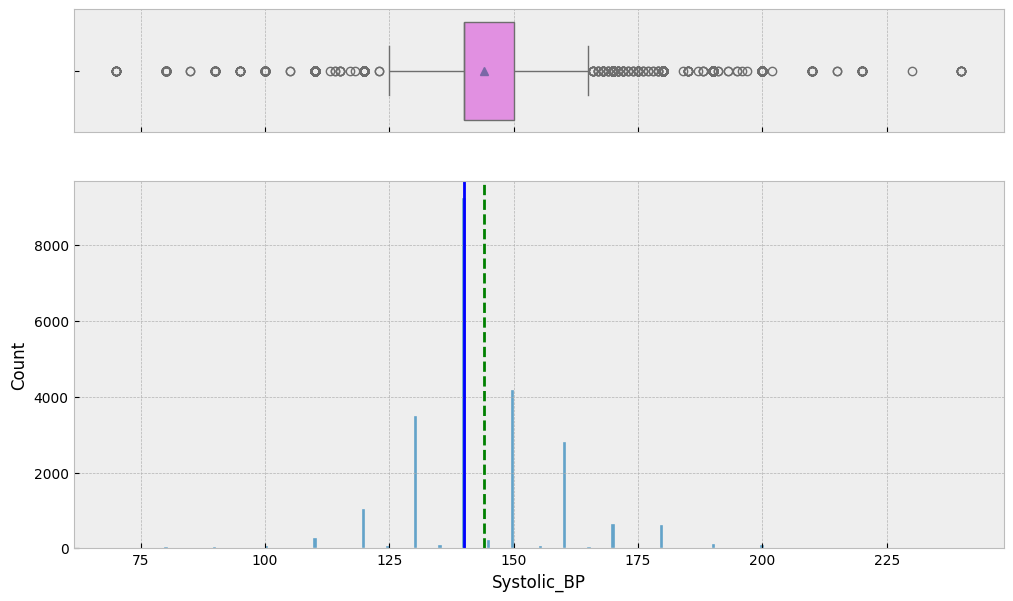

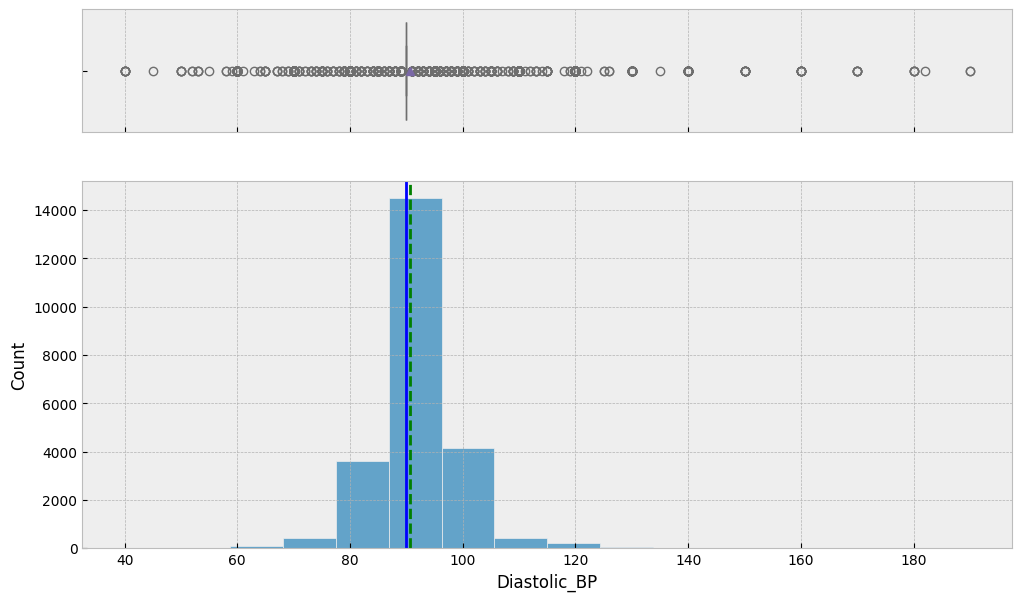

In [ ]:
for columns in nonCategorical_columns:
    hist_box(Original_data, columns)

In [ ]:
# Generate a stacked bar plot to visualize the relationship between a predictor variable and a target variable.
def stackedbar(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tabl = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tabl)
    print("*"*120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
    plt.legend(
    loc="lower left",
    frameon=False,
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()
    print("*"*120)
    print("*"*120)

CDV_Risk  Negative  Positive    All
Gender                             
All           5205     18306  23511
Female        3212     11522  14734
Male          1993      6784   8777
************************************************************************************************************************


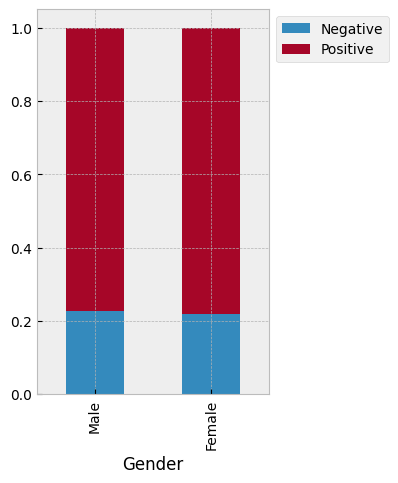

************************************************************************************************************************
************************************************************************************************************************
CDV_Risk           Negative  Positive    All
Cholesterol                                 
All                    5205     18306  23511
Normal                 3606     11188  14794
Above Normal            848      3619   4467
Well Above Normal       751      3499   4250
************************************************************************************************************************


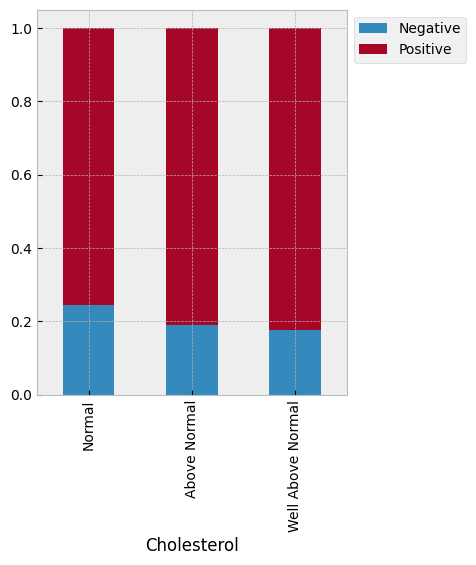

************************************************************************************************************************
************************************************************************************************************************
CDV_Risk           Negative  Positive    All
Glucose                                     
All                    5205     18306  23511
Normal                 4183     14697  18880
Well Above Normal       523      1727   2250
Above Normal            499      1882   2381
************************************************************************************************************************


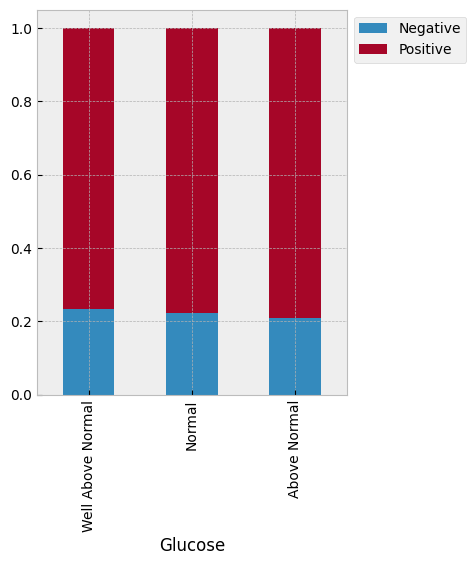

************************************************************************************************************************
************************************************************************************************************************
CDV_Risk    Negative  Positive    All
Smoker                               
All             5205     18306  23511
Non-Smoker      4658     16523  21181
Smoker           547      1783   2330
************************************************************************************************************************


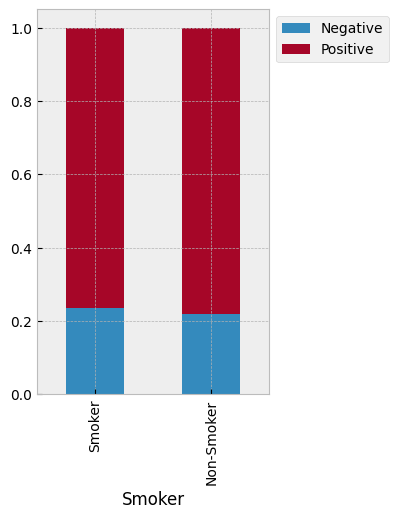

************************************************************************************************************************
************************************************************************************************************************
CDV_Risk     Negative  Positive    All
Alcohol_Use                           
All              5205     18306  23511
Non-Drinker      4826     17127  21953
Drinker           379      1179   1558
************************************************************************************************************************


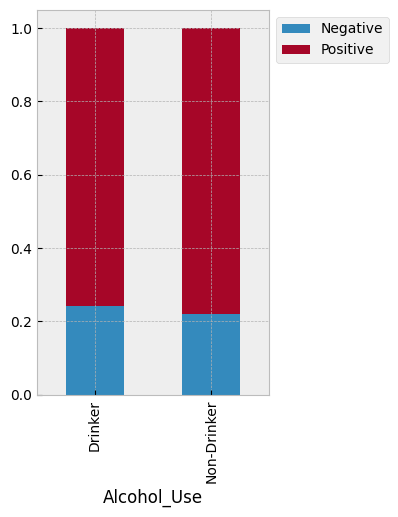

************************************************************************************************************************
************************************************************************************************************************
CDV_Risk           Negative  Positive    All
Physical_Activity                           
All                    5205     18306  23511
Active                 4239     14680  18919
Inactive                966      3626   4592
************************************************************************************************************************


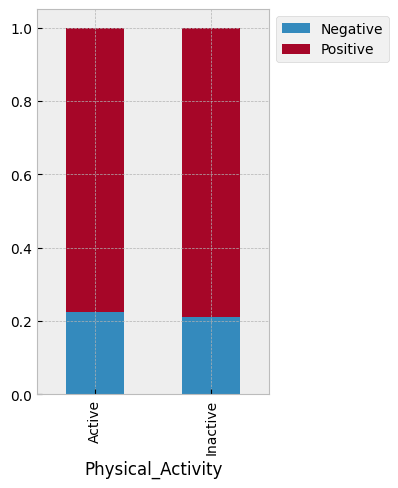

************************************************************************************************************************
************************************************************************************************************************
CDV_Risk  Negative  Positive    All
Age                                
All           5205     18306  23511
57             351      1083   1434
53             334      1045   1379
59             327      1181   1508
55             325      1135   1460
56             274       991   1265
49             270       806   1076
51             269       884   1153
54             249       864   1113
58             246       925   1171
61             241      1024   1265
50             238       649    887
52             237       768   1005
60             236       955   1191
63             229      1035   1264
62             181       771    952
64             174       817    991
45             139       463    602
43             128       406    534
47

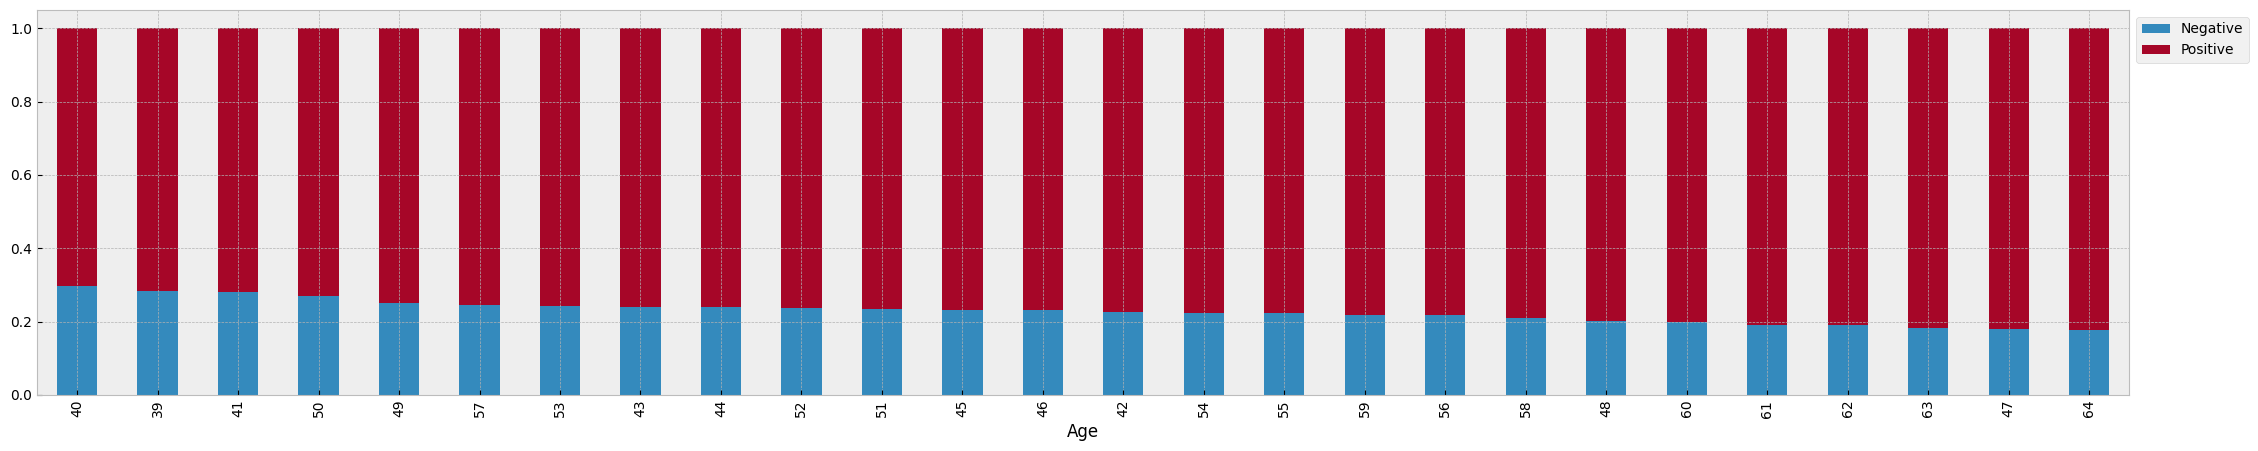

************************************************************************************************************************
************************************************************************************************************************


In [ ]:
selected_columns = [
    'Gender', 'Cholesterol', 'Glucose',
    'Smoker', 'Alcohol_Use', 'Physical_Activity',
    'Age'
]

for column in selected_columns:
    stackedbar(Original_data, column, 'CDV_Risk')

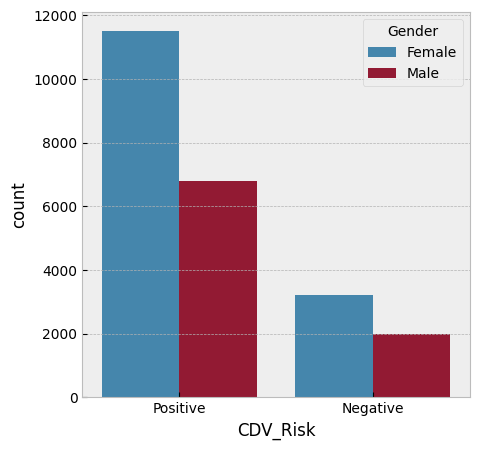

In [ ]:
# Create a count plot to visualize the distribution of the 'CDV_Risk' variable with counts further broken down by 'Gender'
plt.figure(figsize=(5,5))
sns.countplot(x = 'CDV_Risk', data=Original_data ,hue = 'Gender')
plt.show()

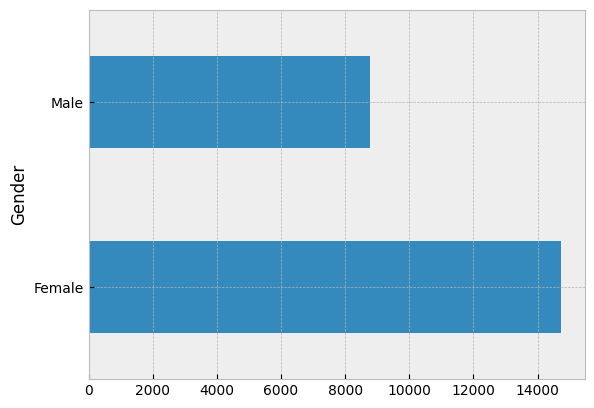

In [ ]:
# Group the 'data' DataFrame by 'Gender', count the occurrences of each unique value in the 'CDV_Risk' variable,
# and create a horizontal bar plot to visualize these counts
Original_data.groupby('Gender').CDV_Risk.count().plot(kind='barh')
plt.show()

In [ ]:
# contigency table between the gender and age
pd.crosstab(Original_data['Gender'], Original_data['Age'])

Age,39,40,41,42,43,44,45,46,47,48,...,55,56,57,58,59,60,61,62,63,64
Gender,,,,,,,,,,,,,,,,,,,,,
Female,198,156,216,144,296,209,362,219,430,292,...,927,846,902,733,1001,789,796,561,810,640
Male,141,113,160,131,238,163,240,193,272,224,...,533,419,532,438,507,402,469,391,454,351


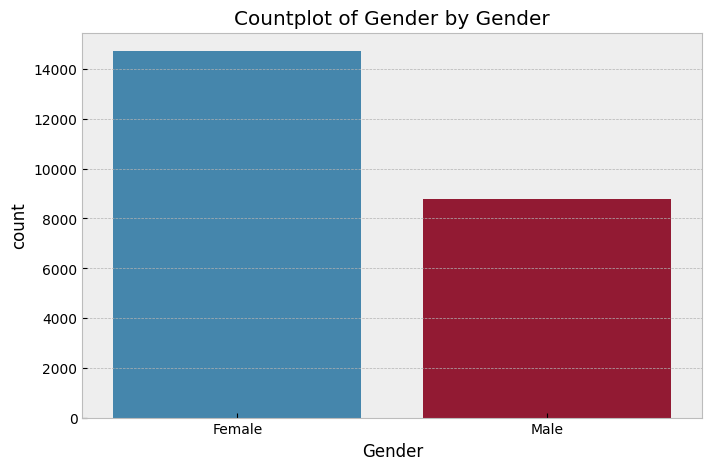

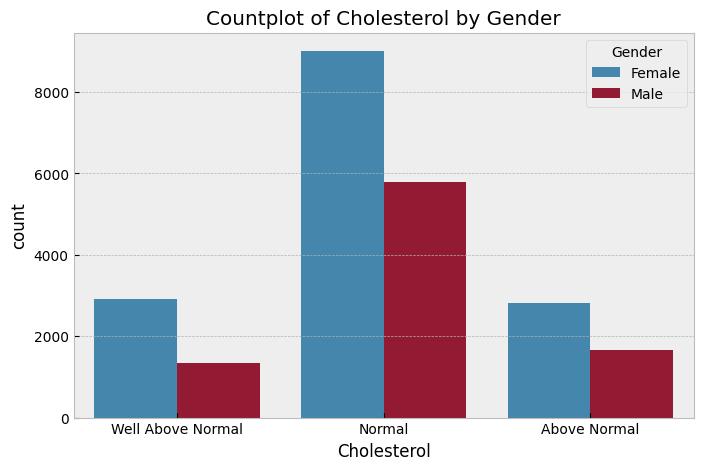

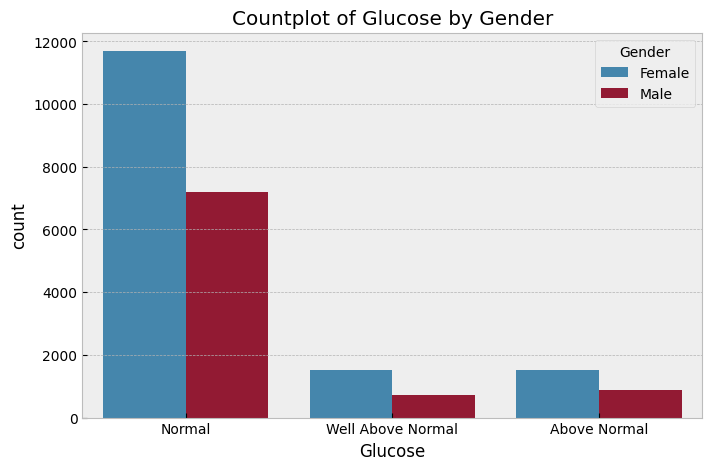

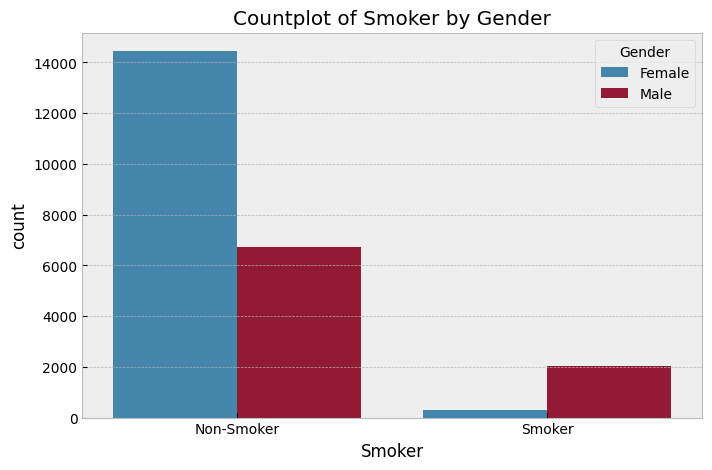

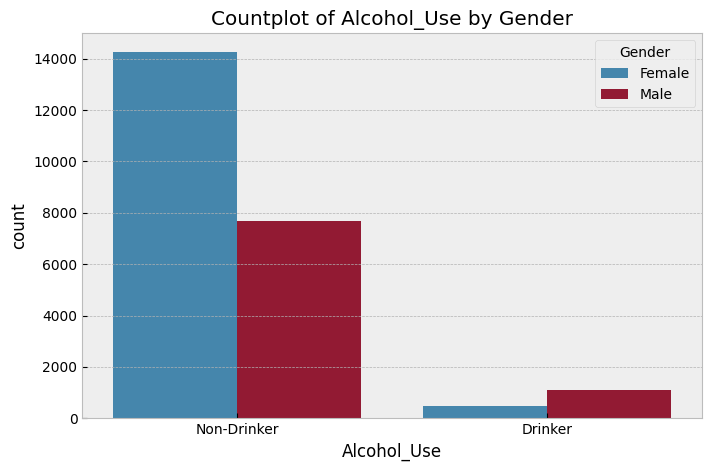

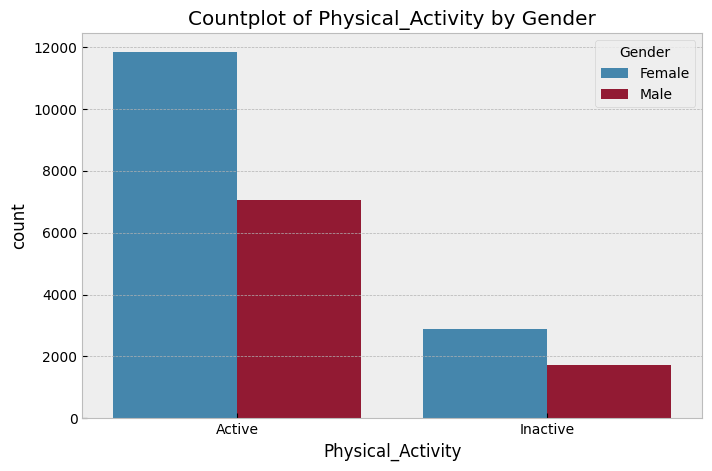

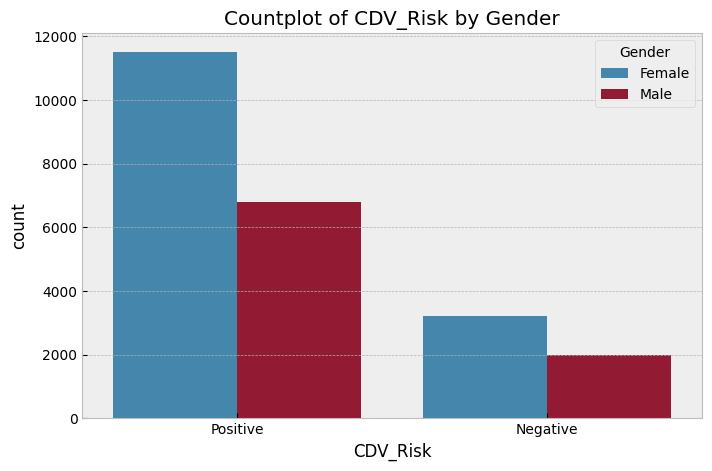

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=Original_data, x=column, hue='Gender')
    plt.title(f'Countplot of {column} by Gender')
    plt.show()

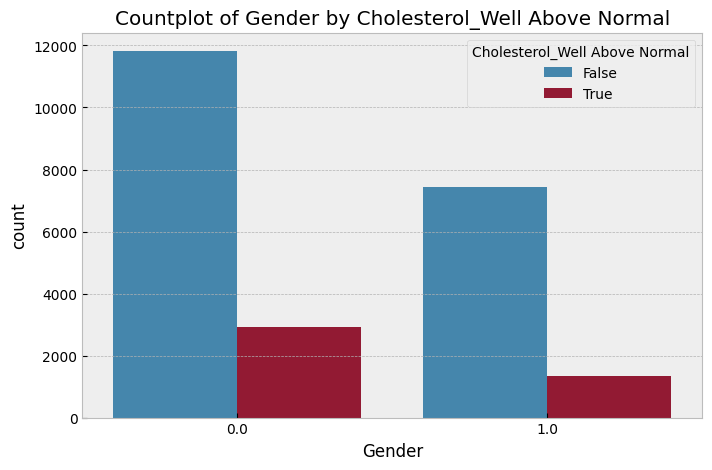

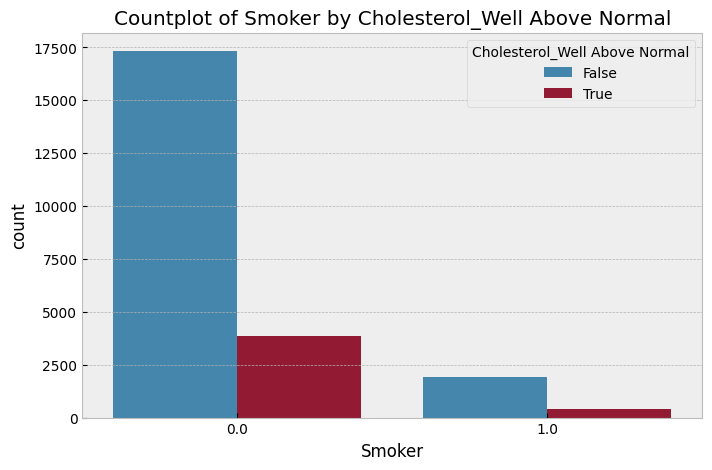

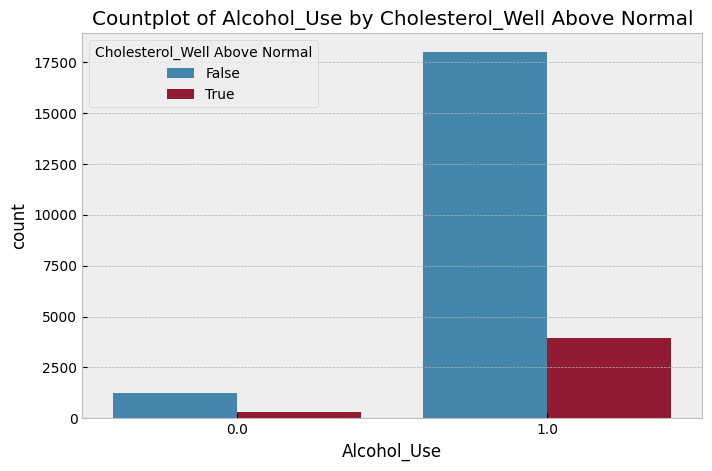

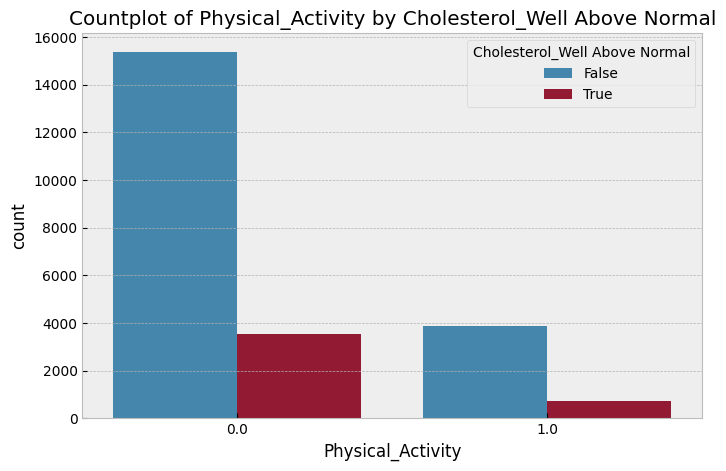

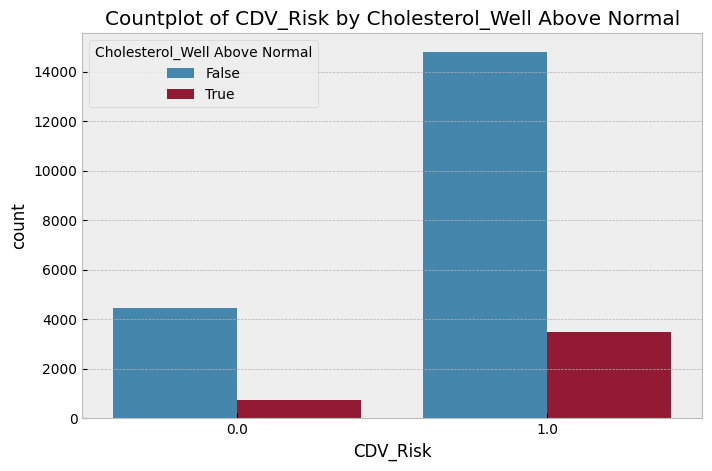

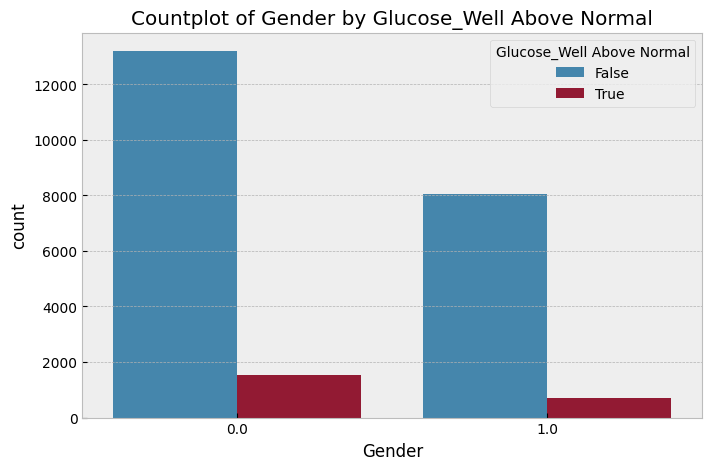

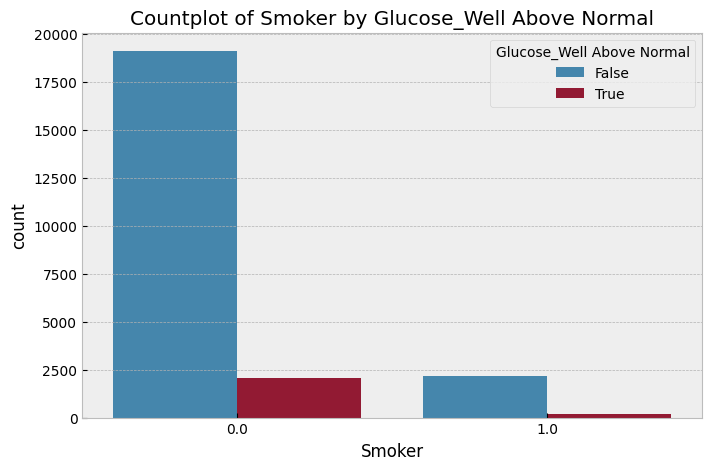

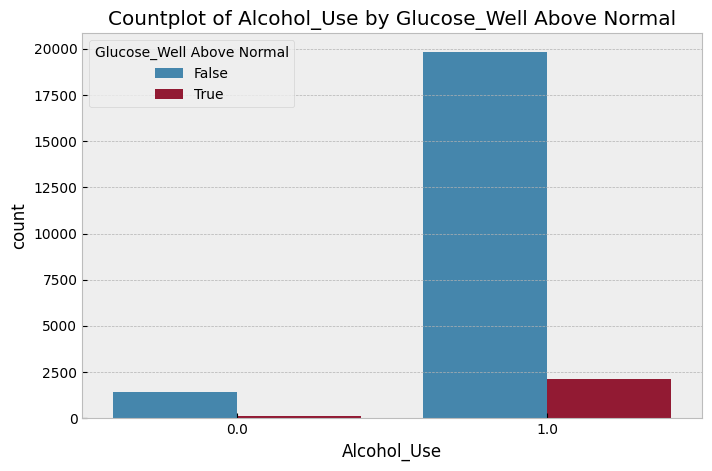

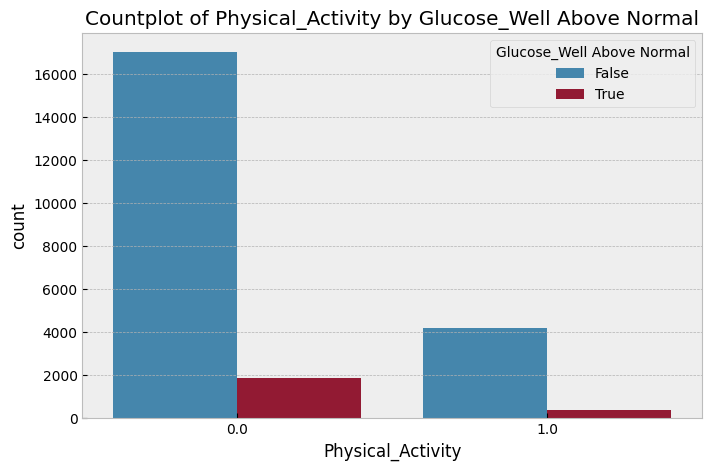

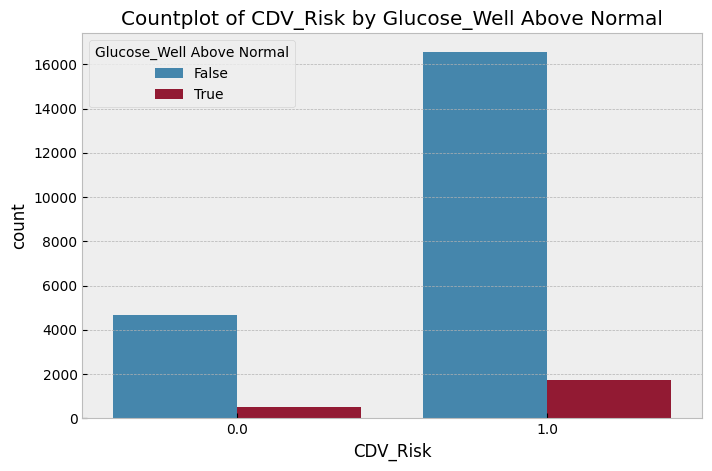

In [ ]:
new_selected_columns = [
    'Gender', 'Smoker', 'Alcohol_Use', 'Physical_Activity',
    'CDV_Risk'
]

hue_columns = [
    'Cholesterol_Well Above Normal', 'Glucose_Well Above Normal'
]

for h_column in hue_columns:
    for ns_column in new_selected_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=ns_column, data=OH_data, hue=h_column)
        plt.title(f'Countplot of {ns_column} by {h_column}')
        plt.show()

<Axes: xlabel='Gender', ylabel='Height_cm'>

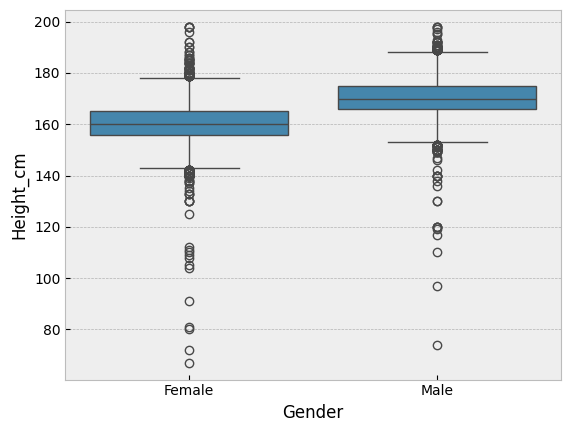

In [ ]:
sns.boxplot(data = Original_data, y = 'Height_cm', x = 'Gender')

<Axes: xlabel='Gender', ylabel='Age'>

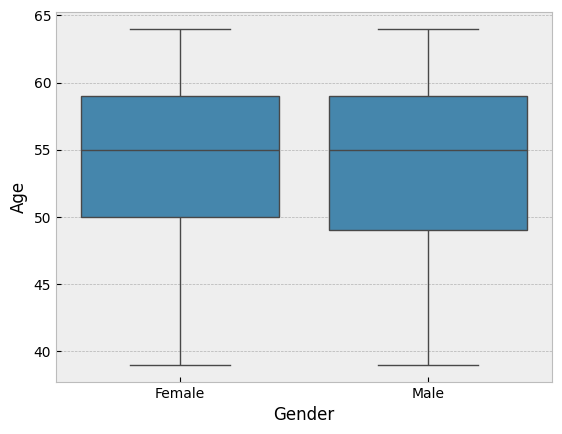

In [ ]:
sns.boxplot(data = Original_data, y = 'Age', x = 'Gender')

<Axes: xlabel='Gender', ylabel='Weight_kg'>

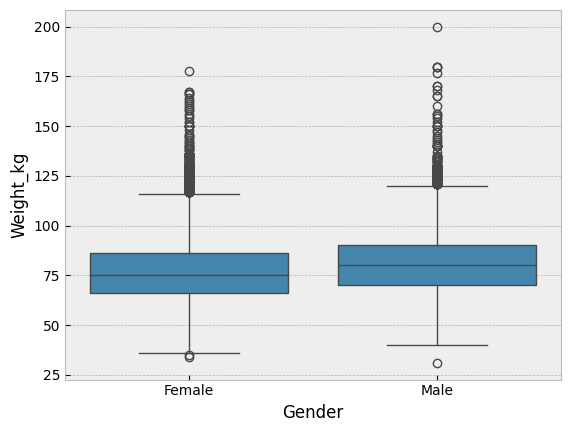

In [ ]:
sns.boxplot(data = Original_data, y = 'Weight_kg', x = 'Gender')

<Axes: xlabel='Cholesterol', ylabel='Weight_kg'>

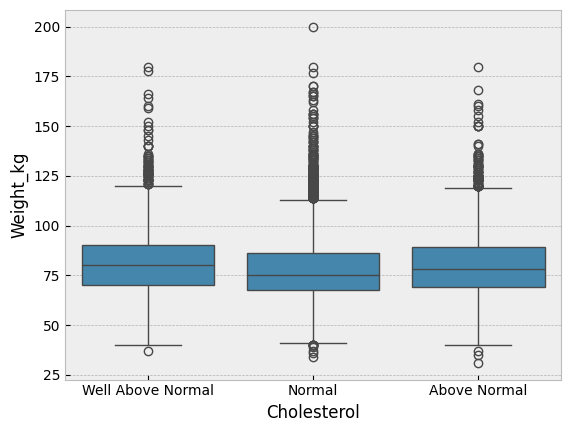

In [ ]:
sns.boxplot(data = Original_data, y = 'Weight_kg', x = 'Cholesterol')

<Axes: xlabel='Glucose', ylabel='Weight_kg'>

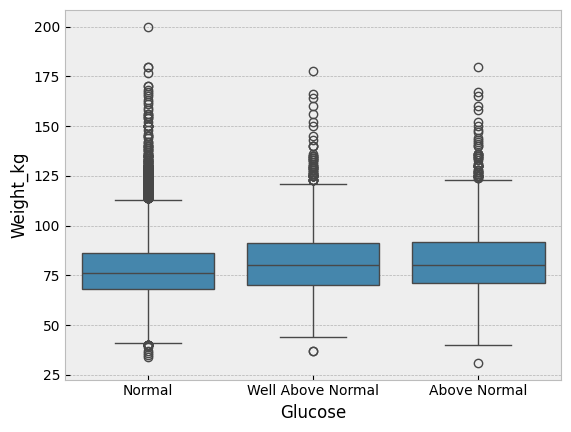

In [ ]:
sns.boxplot(data = Original_data, y = 'Weight_kg', x = 'Glucose')

**Imputed data visualization**

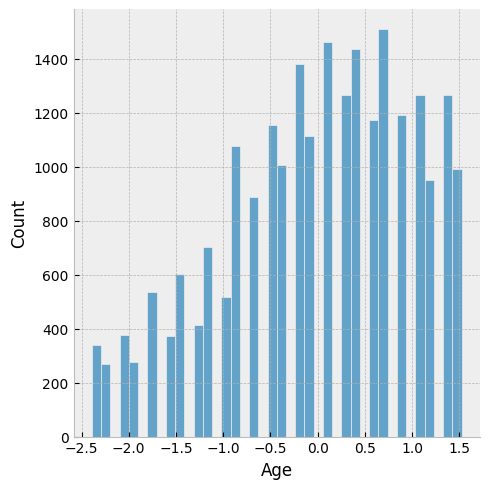

In [ ]:
sns.displot(imputedData["Age"])

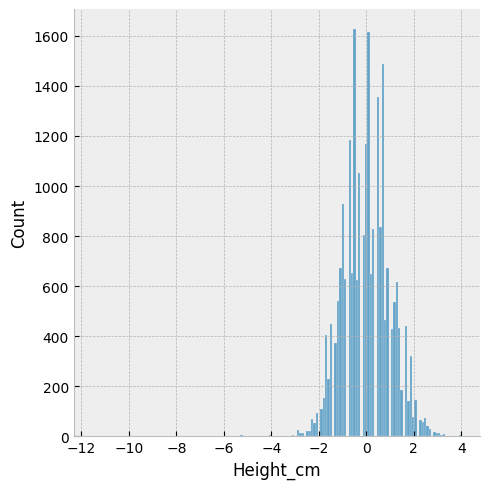

In [ ]:
sns.displot(imputedData["Height_cm"])

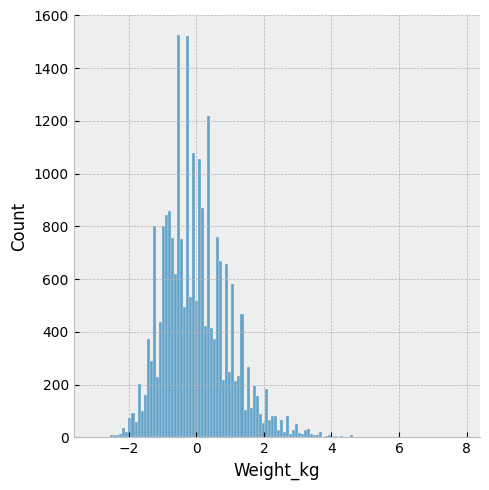

In [ ]:
sns.displot(imputedData["Weight_kg"])

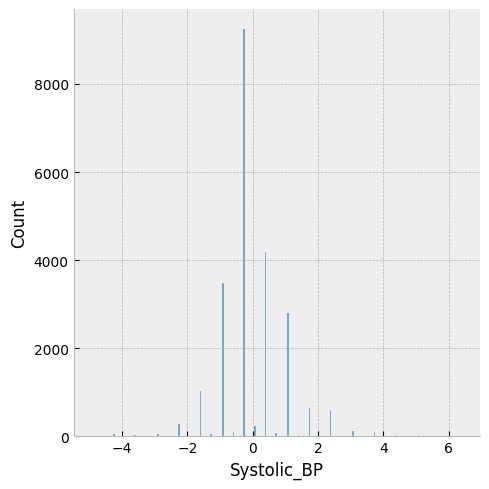

In [ ]:
sns.displot(imputedData["Systolic_BP"])

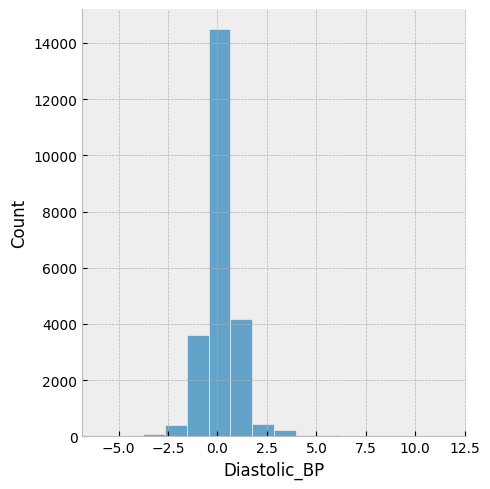

In [ ]:
sns.displot(imputedData["Diastolic_BP"])

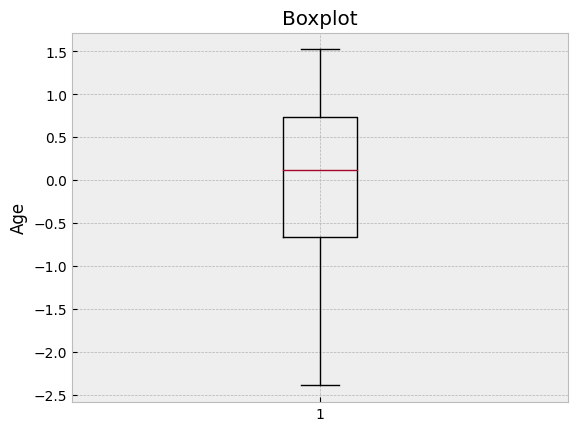

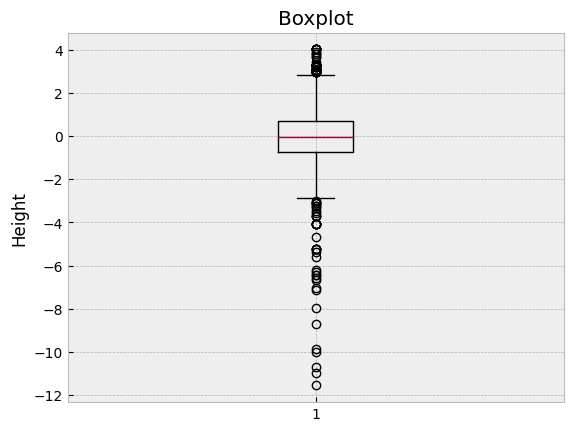

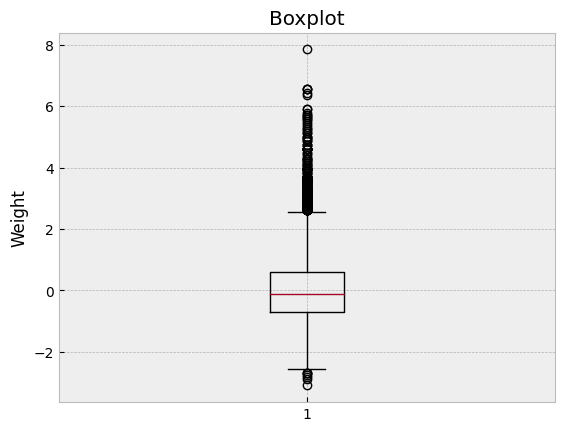

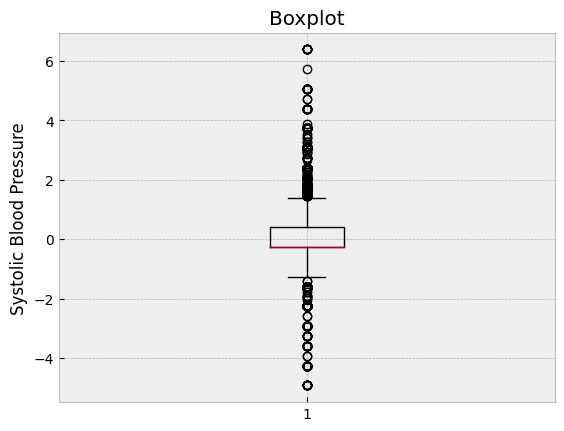

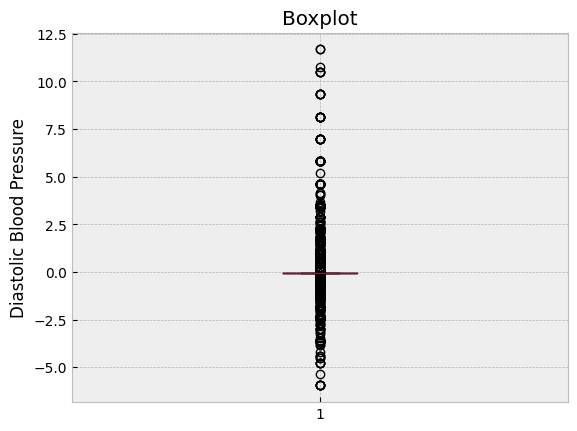

In [ ]:
plt.boxplot(imputedData['Age'])
plt.title('Boxplot')
plt.ylabel('Age')
plt.show()

plt.boxplot(imputedData['Height_cm'])
plt.title('Boxplot')
plt.ylabel('Height')
plt.show()

plt.boxplot(imputedData['Weight_kg'])
plt.title('Boxplot')
plt.ylabel('Weight')
plt.show()

plt.boxplot(imputedData['Systolic_BP'])
plt.title('Boxplot')
plt.ylabel('Systolic Blood Pressure')
plt.show()

plt.boxplot(imputedData['Diastolic_BP'])
plt.title('Boxplot')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

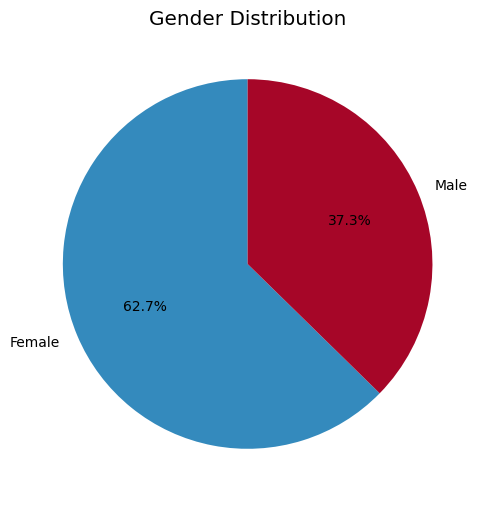

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data['Gender'].value_counts(), labels=Original_data['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

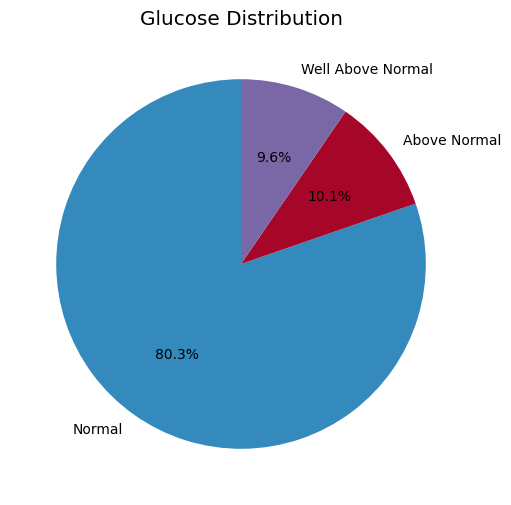

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data['Glucose'].value_counts(), labels=Original_data['Glucose'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Glucose Distribution')
plt.show()

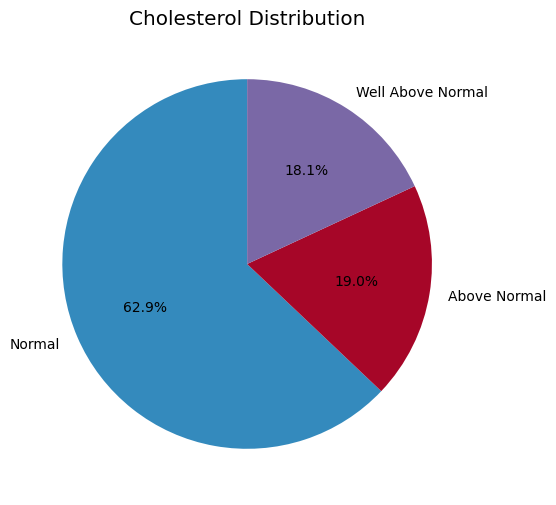

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data['Cholesterol'].value_counts(), labels=Original_data['Cholesterol'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Cholesterol Distribution')
plt.show()

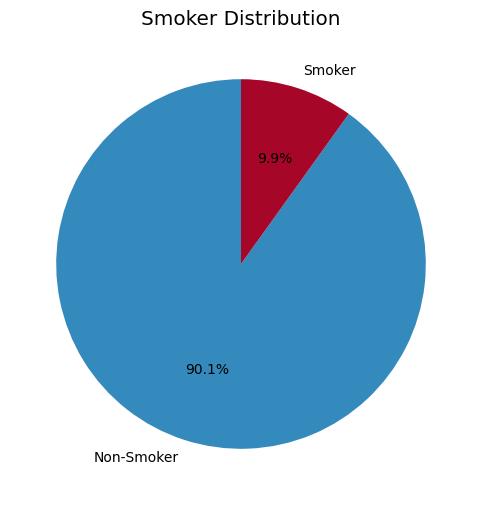

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data['Smoker'].value_counts(), labels=Original_data['Smoker'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Smoker Distribution')
plt.show()

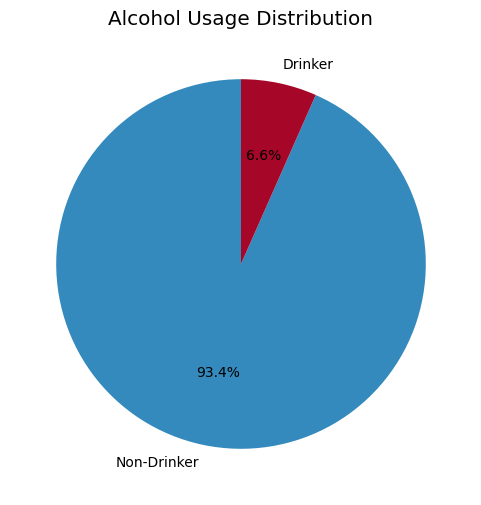

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data['Alcohol_Use'].value_counts(), labels=Original_data['Alcohol_Use'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Alcohol Usage Distribution')
plt.show()

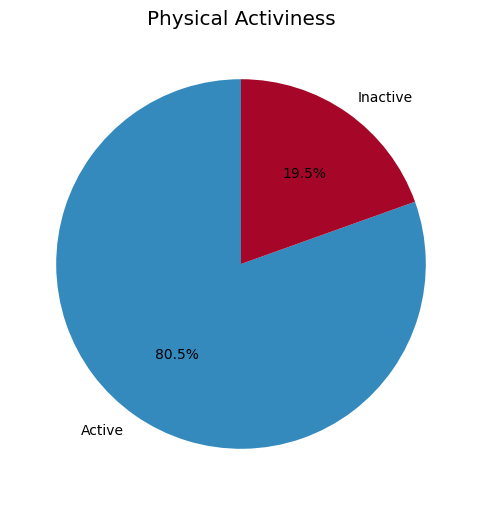

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data['Physical_Activity'].value_counts(), labels=Original_data['Physical_Activity'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Physical Activiness')
plt.show()

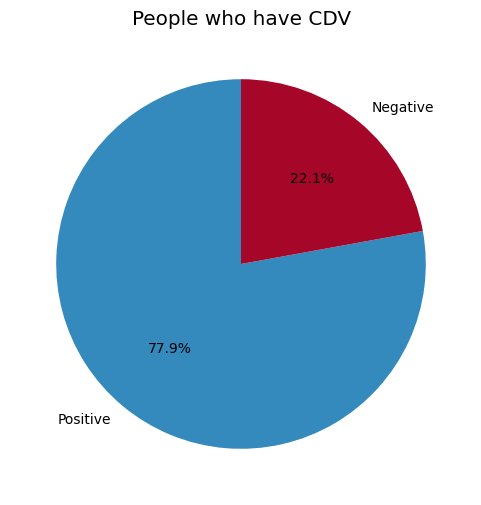

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(data['CDV_Risk'].value_counts(), labels=Original_data['CDV_Risk'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('People who have CDV')
plt.show()

# **Model training and Evoluation**

In [ ]:
train_data = imputedData
train_data.head()

,Age,Gender,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP,Smoker,Alcohol_Use,Physical_Activity,CDV_Risk,Cholesterol_Above Normal,Cholesterol_Normal,Cholesterol_Well Above Normal,Glucose_Above Normal,Glucose_Normal,Glucose_Well Above Normal
0,0.114631,0.0,-0.978711,0.406297,-0.261889,-0.077145,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.980614,1.0,0.564740,0.212072,0.403007,1.097953,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.053412,1.0,1.633283,1.053715,-0.926785,-0.077145,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-2.388786,1.0,1.989464,1.053715,-0.926785,-0.077145,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.366339,0.0,-0.741257,0.730006,0.070559,-0.664694,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
columns = ['Age',	'Gender',	'Height_cm',	'Weight_kg',	'Systolic_BP',	'Diastolic_BP',	'Smoker',	'Alcohol_Use', 'Physical_Activity',	'Cholesterol_Above Normal',	'Cholesterol_Normal',	'Cholesterol_Well Above Normal',	'Glucose_Above Normal',	'Glucose_Normal',	'Glucose_Well Above Normal']

x = train_data[columns]
x.head()

,Age,Gender,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP,Smoker,Alcohol_Use,Physical_Activity,Cholesterol_Above Normal,Cholesterol_Normal,Cholesterol_Well Above Normal,Glucose_Above Normal,Glucose_Normal,Glucose_Well Above Normal
0,0.114631,0.0,-0.978711,0.406297,-0.261889,-0.077145,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.980614,1.0,0.564740,0.212072,0.403007,1.097953,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.053412,1.0,1.633283,1.053715,-0.926785,-0.077145,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-2.388786,1.0,1.989464,1.053715,-0.926785,-0.077145,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.366339,0.0,-0.741257,0.730006,0.070559,-0.664694,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y = train_data['CDV_Risk']
y.head()

,CDV_Risk
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

In [ ]:
X_data = min_max_scaler.fit_transform(x)
X_data

array([[0.64      , 0.        , 0.67938931, ..., 0.        , 1.        ,
        0.        ],
       [0.36      , 1.        , 0.77862595, ..., 0.        , 1.        ,
        0.        ],
       [0.88      , 1.        , 0.84732824, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.72      , 0.        , 0.7480916 , ..., 0.        , 1.        ,
        0.        ],
       [0.88      , 0.        , 0.69465649, ..., 1.        , 0.        ,
        0.        ],
       [0.52      , 1.        , 0.88549618, ..., 0.        , 1.        ,
        0.        ]])

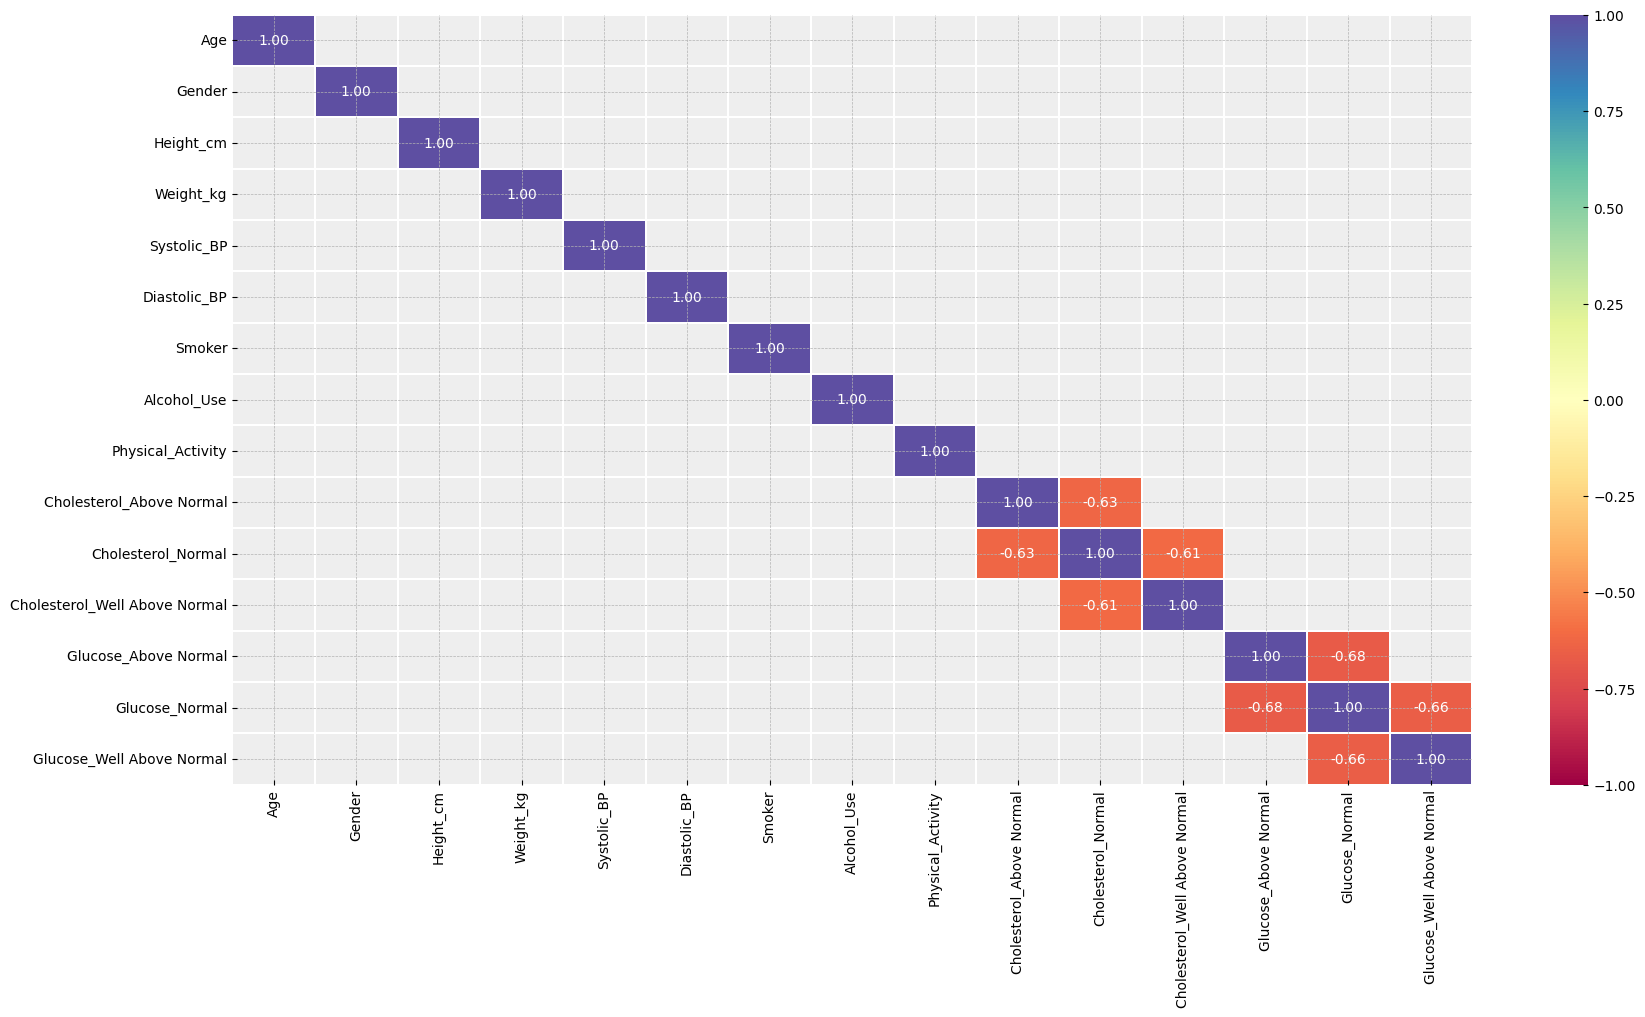

In [ ]:
# Visualize correlation matrix
cor = x.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(cor[(cor >= 0.6) | (cor <= -0.6)], annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral', linewidths=0.1)
plt.show()

In [ ]:
# Importing necessary libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

# Define feature matrix (X) and target vector (Y)
X = train_data.drop(columns=['CDV_Risk'])  # Feature matrix X by dropping the target column from train_data
Y = train_data['CDV_Risk']  # Target vector Y containing the 'target' column from train_data

# Feature selection using SelectFromModel
selector = SelectFromModel(rf(n_estimators=100, random_state=0))  # Initializing SelectFromModel with RandomForestClassifier
selector.fit(X, Y)  # Fitting the selector to the data
support = selector.get_support()  # Obtaining the selected features
features = X.loc[:, support].columns.tolist()  # Getting the names of selected features
print(features)  # Printing the selected features

# Feature importance analysis using RandomForestClassifier
# Here we're fitting a new RandomForestClassifier to get feature importances
print(rf(n_estimators=100, random_state=0).fit(X, Y).feature_importances_)  # Printing feature importances


['Age', 'Height_cm', 'Weight_kg', 'Systolic_BP']
[0.194697   0.01908221 0.23109647 0.27464772 0.14657084 0.05434159
 0.01256257 0.01043191 0.01867955 0.00493504 0.00739087 0.007042
 0.00616344 0.00720933 0.00514947]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=x.columns)  # Convert back to DataFrame with column names
print(X_train_df.columns)


Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'Systolic_BP',
       'Diastolic_BP', 'Smoker', 'Alcohol_Use', 'Physical_Activity',
       'Cholesterol_Above Normal', 'Cholesterol_Normal',
       'Cholesterol_Well Above Normal', 'Glucose_Above Normal',
       'Glucose_Normal', 'Glucose_Well Above Normal'],
      dtype='object')


In [ ]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import itertools  # Import itertools for matrix iteration
import numpy as np  # Import numpy for array operations

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    # Fit the model to the training data
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    # Predict labels for test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate time taken for training and prediction
    time_taken = time.time() - t0

    # Print accuracy and time taken
    print("Accuracy = {}".format(accuracy))
    print("Time taken = {}".format(time_taken))

    # Print classification report
    print(classification_report(y_test, y_pred, digits=5))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = model.classes_  # Get class names from model
    #fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(cm, classes=class_names)

    return model, accuracy, time_taken

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# SVM Classifier

Accuracy = 0.7807782266638316
Time taken = 67.35663270950317
              precision    recall  f1-score   support

         0.0    1.00000   0.00097   0.00194      1032
         1.0    0.78073   1.00000   0.87687      3671

    accuracy                        0.78078      4703
   macro avg    0.89037   0.50048   0.43940      4703
weighted avg    0.82885   0.78078   0.68488      4703

Confusion matrix, without normalization
[[   1 1031]
 [   0 3671]]


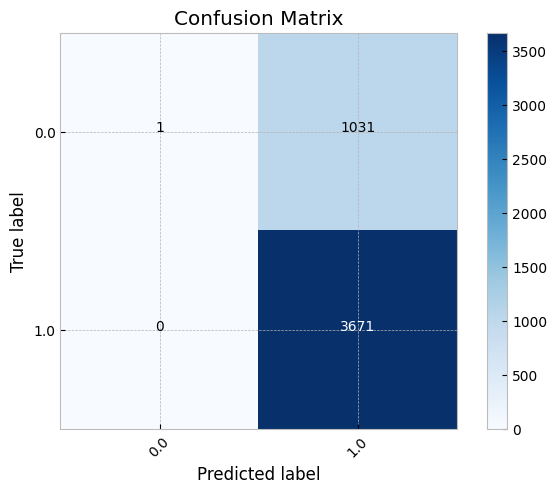

In [ ]:
from sklearn.svm import SVC
params_svc = {'C': 100, 'gamma':0.1, 'kernel': 'rbf'}
model_svc = SVC(**params_svc)
model_svc, accuracy_svc, tt_svc = run_model(model_svc, X_train, y_train, X_test, y_test)


# RF Classifier

In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    # Fit the model to the training data
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    # Predict labels for test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate time taken for training and prediction
    time_taken = time.time() - t0

    # Print accuracy and time taken
    print("Accuracy = {}".format(accuracy))
    print("Time taken = {}".format(time_taken))

    # Print classification report
    print(classification_report(y_test, y_pred, digits=5))

    return model, accuracy, time_taken

# Parameters for RandomForestClassifier
params_rf = {'bootstrap': True,
             'max_depth': 32,
             'max_features': 9,
             'min_samples_leaf': 6,
             'min_samples_split': 14,
             'n_estimators': 128,
             'class_weight': 'balanced'
             }

# Initialize RandomForestClassifier with specified parameters
model_rf = RandomForestClassifier(**params_rf)

# Run the model
model_rf, accuracy_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


Accuracy = 0.7533489262173081
Time taken = 4.1635003089904785
              precision    recall  f1-score   support

         0.0    0.42825   0.37016   0.39709      1032
         1.0    0.82944   0.86107   0.84496      3671

    accuracy                        0.75335      4703
   macro avg    0.62885   0.61561   0.62103      4703
weighted avg    0.74141   0.75335   0.74668      4703



# XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
params_xgb = {'n_estimators':50, 'max_depth':5}
model_xgb = XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

Accuracy = 0.7920476291728684
Time taken = 0.18772029876708984
              precision    recall  f1-score   support

         0.0    0.58654   0.17733   0.27232      1032
         1.0    0.80665   0.96486   0.87869      3671

    accuracy                        0.79205      4703
   macro avg    0.69659   0.57109   0.57551      4703
weighted avg    0.75835   0.79205   0.74563      4703



# CB CLassifier

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
param_cb = {
    'iterations': 100,
    'max_depth': 8,
    'learning_rate': 0.09
}
model_cb = CatBoostClassifier(**param_cb)
model_cb, accuracy_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00
0:	learn: 0.6615727	total: 55.5ms	remaining: 5.5s
1:	learn: 0.6350636	total: 62.7ms	remaining: 3.07s
2:	learn: 0.6131369	total: 68.9ms	remaining: 2.23s
3:	learn: 0.5941502	total: 75.6ms	remaining: 1.81s
4:	learn: 0.5778945	total: 82.3ms	remaining: 1.56s
5:	learn: 0.5640519	total: 89ms	remaining: 1.4s
6:	learn: 0.5527242	total: 95.7ms	remaining: 1.27s
7:	learn: 0.5428866	total: 103ms	remaining: 1.18s
8:	learn: 0.5345376	total: 109ms	remaining: 1.1s
9:	learn: 0.5274900	total: 113ms	remaining: 1.02s
10:	learn: 0.5210831	total: 120ms	remaining: 972ms
11:	learn: 0.5153730	total: 127ms	remaining: 930ms
12:	learn: 0.5109255	total: 133ms	remaining: 891ms
13:	learn: 0.5066752	total: 140ms	remaining: 860ms
14:	learn: 0.5032092	total: 147ms	remaining: 832ms
15:	learn: 0.5002296	total: 153ms	remaining: 804ms
16:	learn: 0.4974116	total: 160ms	remaining: 782ms
17:	learn: 0.4950499	total: 167ms	remaining: 760ms
18:	learn: 0

0:	learn: 0.6615727	total: 6.92ms	remaining: 685ms
1:	learn: 0.6350636	total: 14.5ms	remaining: 711ms
2:	learn: 0.6131369	total: 20.9ms	remaining: 674ms
3:	learn: 0.5941502	total: 27.5ms	remaining: 659ms
4:	learn: 0.5778945	total: 34.2ms	remaining: 650ms
5:	learn: 0.5640519	total: 40.8ms	remaining: 639ms
6:	learn: 0.5527242	total: 47.6ms	remaining: 632ms
7:	learn: 0.5428866	total: 54.6ms	remaining: 628ms
8:	learn: 0.5345376	total: 61.4ms	remaining: 621ms
9:	learn: 0.5274900	total: 65.2ms	remaining: 587ms
10:	learn: 0.5210831	total: 72.1ms	remaining: 583ms
11:	learn: 0.5153730	total: 78.6ms	remaining: 577ms
12:	learn: 0.5109255	total: 85ms	remaining: 569ms
13:	learn: 0.5066752	total: 91.7ms	remaining: 563ms
14:	learn: 0.5032092	total: 98.3ms	remaining: 557ms
15:	learn: 0.5002296	total: 105ms	remaining: 549ms
16:	learn: 0.4974116	total: 111ms	remaining: 543ms
17:	learn: 0.4950499	total: 118ms	remaining: 537ms
18:	learn: 0.4930413	total: 124ms	remaining: 530ms
19:	learn: 0.4913255	total: 

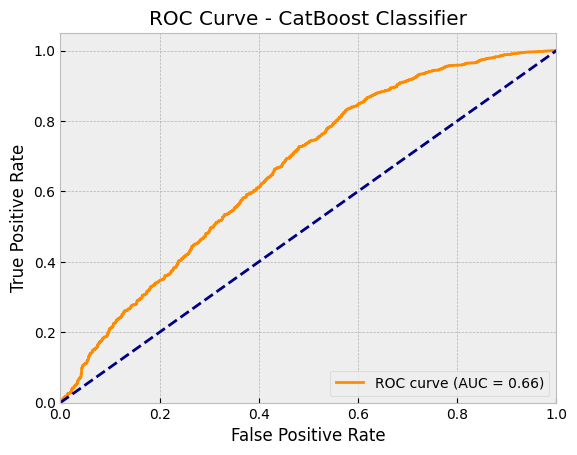

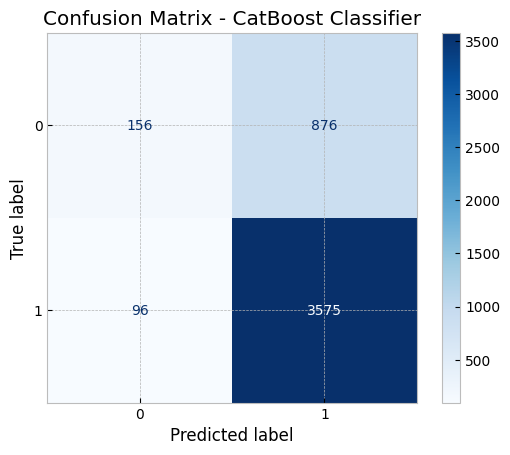

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the CatBoost classifier
model_cb.fit(X_train, y_train)

# Get predicted probabilities and class labels
y_probs_cb = model_cb.predict_proba(X_test)[:, 1]  # For ROC curve
y_pred_cb = model_cb.predict(X_test)  # For confusion matrix

# Generate and plot ROC curve
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_probs_cb)
roc_auc_cb = auc(fpr_cb, tpr_cb)

plt.figure()
plt.plot(fpr_cb, tpr_cb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_cb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# Generate and plot confusion matrix
cm_cb = confusion_matrix(y_test, y_pred_cb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cb)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_lr = {
    'C': 10,
    'penalty': 'l2',
    'solver': 'newton-cg'
}

model_lr = LogisticRegression(**param_lr)
model_lr, accuracy_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.7826918987880076
Time taken = 0.0796515941619873
              precision    recall  f1-score   support

         0.0    0.57576   0.03682   0.06922      1032
         1.0    0.78564   0.99237   0.87699      3671

    accuracy                        0.78269      4703
   macro avg    0.68070   0.51460   0.47310      4703
weighted avg    0.73958   0.78269   0.69973      4703



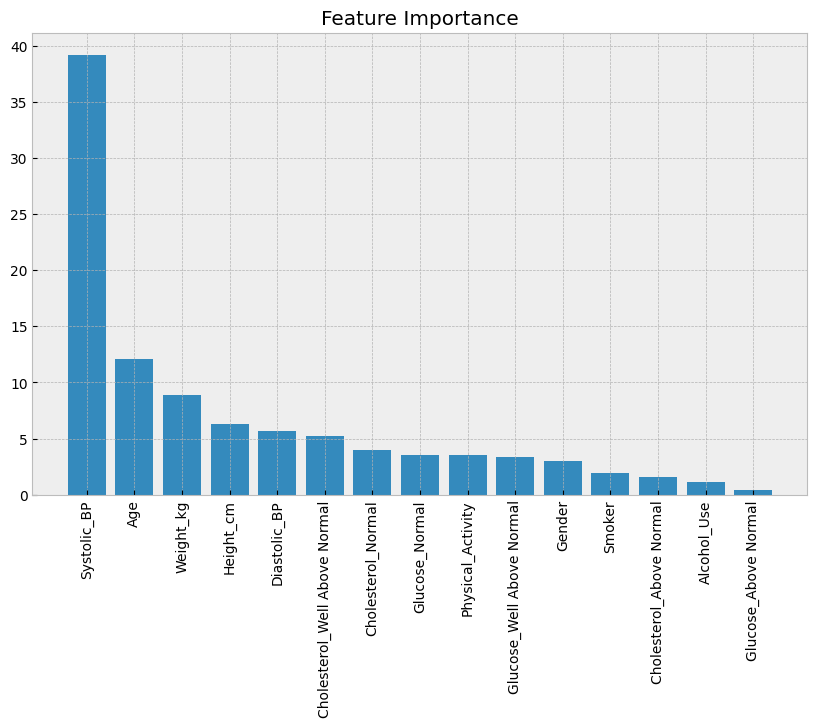

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model = model_cb
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


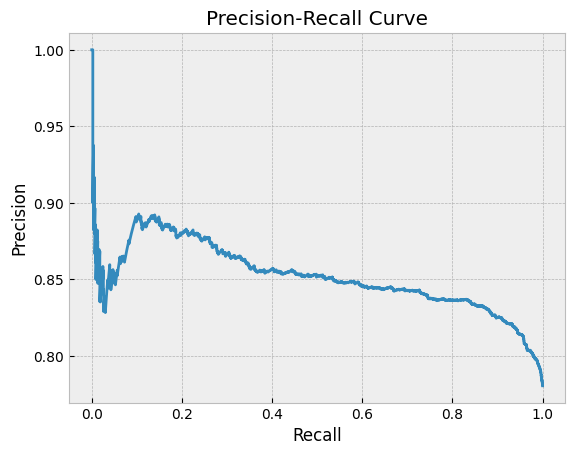

In [ ]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = model.predict_proba(X_test)[:, 1]  #Probability of positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

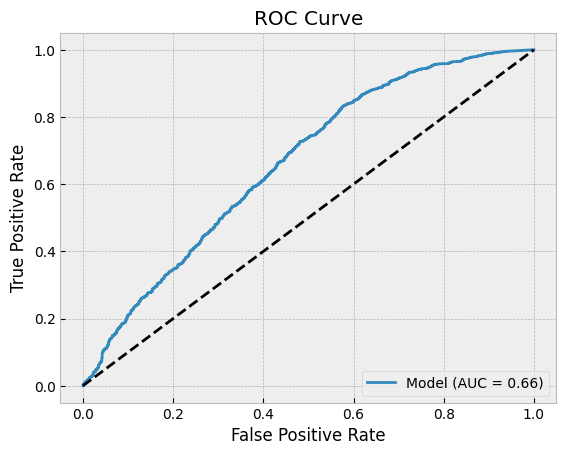

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Model (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

np.random.seed(42)
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(silent=True)
}

results_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    results_list.append({"Model": name, "AUC-ROC": auc_roc})

results = pd.DataFrame(results_list)

print(results)

                 Model   AUC-ROC
0  Logistic Regression  0.523738
1        Random Forest  0.494932
2                  SVM  0.511069
3              XGBoost  0.457148
4             CatBoost  0.518270


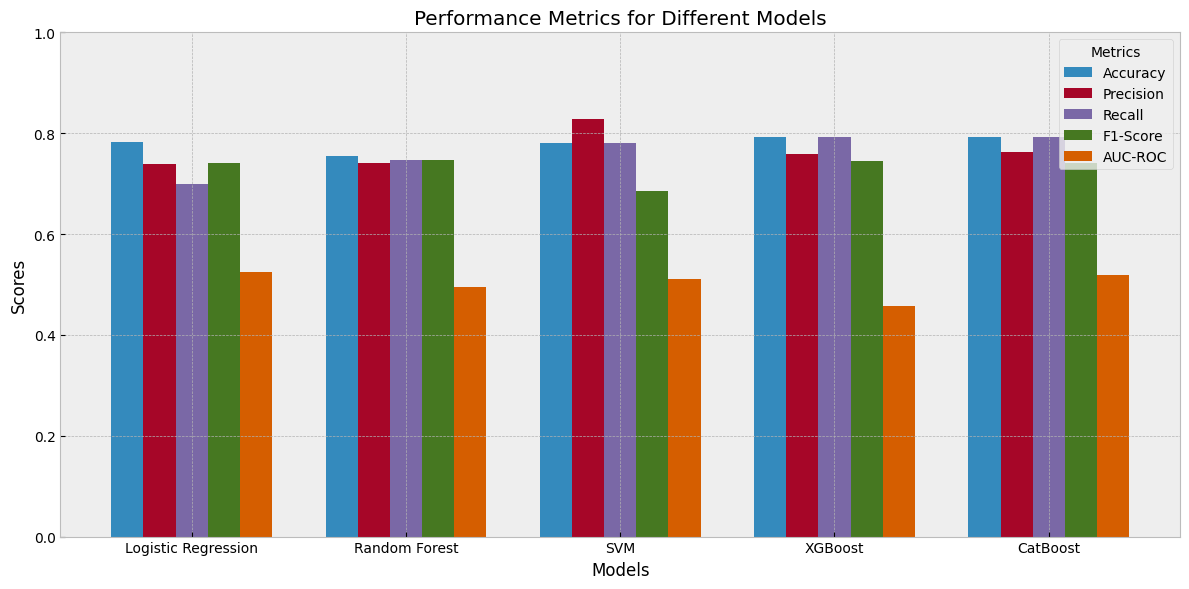

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "CatBoost"],
    "Accuracy": [0.78269, 0.75377, 0.78078, 0.79205, 0.79332],
    "Precision": [0.73958, 0.74118, 0.82885, 0.75835, 0.76278],
    "Recall": [0.69973, 0.74670, 0.78078, 0.79205, 0.79332],
    "F1-Score": [0.74047, 0.74670, 0.68488, 0.74563, 0.74047],
    "AUC-ROC": [0.523738, 0.494932, 0.511069, 0.457148, 0.518270]
}

results = pd.DataFrame(data)
results.set_index('Model', inplace=True)

bar_width = 0.15
index = np.arange(len(results))

plt.figure(figsize=(12, 6))

for i, metric in enumerate(results.columns):
    plt.bar(index + i * bar_width, results[metric], bar_width, label=metric)

plt.title("Performance Metrics for Different Models")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.xticks(index + bar_width * (len(results.columns) - 1) / 2, results.index)
plt.ylim(0, 1)
plt.legend(title="Metrics")

plt.tight_layout()
plt.show()
